In [2]:
import os
import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

import pyarrow as pa
import pyarrow.parquet as pq


# 1. Data preparation

## -1. Loading Both data

In [4]:
file_list = os.listdir('D:/Working_Place/new_uber/data/data_processed')
file_list.remove('.ipynb_checkpoints')
file_list

['f1902.parquet',
 'f1903.parquet',
 'f1904.parquet',
 'f1905.parquet',
 'f1906.parquet',
 'f1907.parquet',
 'f1908.parquet',
 'f1909.parquet',
 'f1910.parquet',
 'f1911.parquet',
 'f1912.parquet',
 'f2001.parquet',
 'f2002.parquet',
 'f2003.parquet',
 'f2004.parquet',
 'f2005.parquet',
 'f2006.parquet',
 'f2007.parquet',
 'f2008.parquet',
 'f2009.parquet',
 'f2010.parquet',
 'f2011.parquet',
 'f2012.parquet',
 'f2101.parquet',
 'f2102.parquet',
 'f2103.parquet',
 'f2104.parquet',
 'f2105.parquet',
 'f2106.parquet',
 'f2107.parquet',
 'f2108.parquet',
 'f2109.parquet',
 'f2110.parquet',
 'f2111.parquet',
 'f2112.parquet',
 'f2201.parquet',
 'f2202.parquet',
 'f2203.parquet',
 'f2204.parquet',
 'f2205.parquet',
 'f2206.parquet',
 'f2207.parquet',
 'f2208.parquet',
 'f2209.parquet',
 'f2210.parquet',
 'f2211.parquet',
 'f2212.parquet',
 'y1901.parquet',
 'y1902.parquet',
 'y1903.parquet',
 'y1904.parquet',
 'y1905.parquet',
 'y1906.parquet',
 'y1907.parquet',
 'y1908.parquet',
 'y1909.pa

In [5]:
yellow_data_samples = []
fhvhv_data_samples = []
for file in tqdm(file_list):
    if 'f' in file:
        each_data = pd.read_parquet('D:/Working_Place/new_uber/data/data_processed/'+file,
                                   columns=['hvfhs_license_num','pickup_datetime',
                                           'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
                                           'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
                                           'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
                                           'average_speed'])
        each_data_sampled = each_data.sample(frac=0.01)
        fhvhv_data_samples.append(each_data_sampled)
    elif 'y' in file:
        if file == 'y1901.parquet':
            continue
        each_data = pd.read_parquet('D:/Working_Place/new_uber/data/data_processed/'+file)
        each_data_sampled = each_data.sample(frac=0.01)
        yellow_data_samples.append(each_data_sampled)
    del each_data
    del each_data_sampled

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [06:24<00:00,  4.04s/it]


In [6]:
yellow_data_sample = pd.concat(yellow_data_samples)
fhvhv_data_sample = pd.concat(fhvhv_data_samples)
display(yellow_data_sample)
display(fhvhv_data_sample)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,average_speed
index,,,,,,,,,,,,,,,,,,,,
1674399,2,2019-02-07 14:11:27,2019-02-07 14:33:27,1.0,3.65,1.0,N,79,217,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80,2.5,0.0,9.954545
2632689,2,2019-02-11 07:46:40,2019-02-11 07:51:06,1.0,0.50,1.0,N,48,161,2,5.0,0.0,0.5,0.00,0.0,0.3,5.80,2.5,0.0,6.766917
2817131,1,2019-02-11 21:01:48,2019-02-11 21:04:55,1.0,1.00,1.0,N,239,151,1,5.0,3.0,0.5,2.20,0.0,0.3,11.00,2.5,0.0,19.251337
6707799,1,2019-02-27 21:13:51,2019-02-27 21:23:28,2.0,1.60,1.0,N,164,237,1,8.5,3.0,0.5,3.65,0.0,0.3,15.95,2.5,0.0,9.982669
3175446,2,2019-02-13 12:16:33,2019-02-13 12:24:31,6.0,0.77,1.0,N,161,164,1,6.5,0.0,0.5,1.96,0.0,0.3,9.26,2.5,0.0,5.799163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394948,2,2022-12-04 07:01:01,2022-12-04 07:05:37,1.0,0.85,1.0,N,141,140,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30,2.5,0.0,11.086957
26492,2,2022-12-01 10:04:14,2022-12-01 10:27:57,1.0,4.96,1.0,N,68,87,1,20.0,0.0,0.5,0.28,0.0,0.3,21.08,2.5,0.0,12.548138
489905,2,2022-12-05 07:35:43,2022-12-05 07:50:25,1.0,2.42,1.0,N,140,238,1,11.5,0.0,0.5,2.00,0.0,0.3,14.30,2.5,0.0,9.877551


,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,average_speed
index,,,,,,,,,,,,,,,,
18711292,HV0003,2019-02-27 00:18:31,2019-02-27 00:44:12,234,17,9.3219,1540,21.65,0.0,0.55,1.95,2.75,0.0,0.00,19.10,21.791455
8765125,HV0003,2019-02-13 06:33:58,2019-02-13 06:37:15,3,185,1.3202,197,6.60,0.0,0.17,0.59,0.00,0.0,0.00,5.53,24.125482
9013201,HV0003,2019-02-13 14:30:15,2019-02-13 15:04:15,147,169,6.2629,2041,9.76,0.0,0.24,0.87,0.00,0.0,0.00,12.90,11.046761
18058131,HV0005,2019-02-26 04:38:40,2019-02-26 04:50:14,22,14,4.2021,660,10.17,0.0,0.25,0.90,0.00,0.0,2.00,8.58,22.920545
17268403,HV0005,2019-02-24 21:57:28,2019-02-24 22:06:08,163,234,2.9141,479,10.07,0.0,0.25,0.89,2.75,0.0,0.00,6.27,21.901378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6766650,HV0003,2022-12-10 23:04:16,2022-12-10 23:38:30,68,141,5.5062,2054,35.04,0.0,1.05,3.11,2.75,0.0,0.00,29.27,9.650594
5569868,HV0003,2022-12-09 13:34:09,2022-12-09 13:59:41,49,79,6.6332,1532,31.45,0.0,0.94,2.79,2.75,0.0,0.00,21.99,15.587154
4651545,HV0003,2022-12-08 06:44:17,2022-12-08 06:47:22,132,132,2.3345,185,7.39,0.0,0.30,0.88,0.00,2.5,0.00,5.40,45.428108


In [7]:
yellow_data_sample['tip_rate']=yellow_data_sample.apply(lambda x: x.tip_amount/x.fare_amount,axis=1)
fhvhv_data_sample['tip_rate']=fhvhv_data_sample.apply(lambda x: x.tips/x.base_passenger_fare,axis=1)

In [8]:
yellow_data_sample['trip_time'] = yellow_data_sample.apply(lambda x: (x.tpep_dropoff_datetime-x.tpep_pickup_datetime).seconds,axis=1)

In [9]:
uber_data_sample = fhvhv_data_sample[fhvhv_data_sample.hvfhs_license_num=='HV0003']

## -2. Grouping by pickup_datetime

In [13]:
type(yellow_data_sample.loc[5861723,'tpep_pickup_datetime']),type(uber_data_sample.loc[18043861,'pickup_datetime'])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

In [36]:
yellow_data_sample.columns,uber_data_sample.columns

(Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee', 'average_speed',
        'tip_rate', 'trip_time'],
       dtype='object'),
 Index(['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime',
        'PULocationID', 'DOLocationID', 'trip_distance', 'trip_time',
        'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
        'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
        'average_speed', 'tip_rate'],
       dtype='object'))

In [10]:
yellow_data_sample.rename(columns={'trip_distance':'y_trip_distance',
                                  'trip_time':'y_trip_time',
                                  'passenger_count':'y_passenger_count',
                                  'fare_amount':'y_fare_amount',
                                  'tip_amount':'y_tip_amount',
                                  'tip_rate':'y_tip_rate',
                                  'airport_fee':'y_airport_fee',
                                  'average_speed':'y_average_speed'},
                         inplace=True)
uber_data_sample.rename(columns={'trip_distance':'u_trip_distance',
                                  'trip_time':'u_trip_time',
                                  'base_passenger_fare':'u_base_passenger_fare',
                                  'tips':'u_tip_amount',
                                  'tip_rate':'u_tip_rate',
                                  'airport_fee':'u_airport_fee',
                                  'average_speed':'u_average_speed'},
                         inplace=True)

D:\Anaconda\envs\new_uber\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
yellow_daily = yellow_data_sample.groupby([yellow_data_sample.tpep_pickup_datetime.dt.year,
                                       yellow_data_sample.tpep_pickup_datetime.dt.month,
                                        yellow_data_sample.tpep_pickup_datetime.dt.day]).agg({'y_trip_distance':['count','mean'],
                                                                                              'y_trip_time':'mean',
                                                                                              'y_passenger_count':'mean',
                                                                                              'y_fare_amount':'mean',
                                                                                              'y_tip_amount':'mean',
                                                                                               'y_tip_rate':'mean',
                                                                                              'y_airport_fee':['sum','mean'],
                                                                                              'y_average_speed':'mean'})

uber_daily = uber_data_sample.groupby([uber_data_sample.pickup_datetime.dt.year,
                                       uber_data_sample.pickup_datetime.dt.month,
                                        uber_data_sample.pickup_datetime.dt.day]).agg({'u_trip_distance':['count','mean'],
                                                                                      'u_trip_time':'mean',
                                                                                      'u_base_passenger_fare':'mean',
                                                                                      'u_tip_amount':'mean',
                                                                                       'u_tip_rate':'mean',
                                                                                       'u_airport_fee':['sum','mean'],
                                                                                      'u_average_speed':'mean'})
display(yellow_daily)
display(uber_daily)

y_trip_distance  \
                                                                         count   
tpep_pickup_datetime tpep_pickup_datetime tpep_pickup_datetime                   
2019                 2                    1                               2750   
                                          2                               2475   
                                          3                               1961   
                                          4                               2132   
                                          5                               2245   
...                                                                        ...   
2022                 12                   27                               788   
                                          28                               745   
                                          29                               847   
                                          30                               789   
                                          31                               738   

                                                                          \
                                                                    mean   
tpep_pickup_datetime tpep_pickup_datetime tpep_pickup_datetime             
2019                 2                    1                     2.202789   
                                          2                     2.030517   
                                          3                     2.241831   
                                          4                     2.354099   
                                          5                     2.329073   
...                                                                  ...   
2022                 12                   27                    2.868236   
                                          28                    3.004886   
                                          29                    3.204333   
                                          30                    3.254867   
                                          31                    2.401911   

                                                                y_trip_time  \
                                                                       mean   
tpep_pickup_datetime tpep_pickup_datetime tpep_pickup_datetime                
2019                 2                    1                      826.151273   
                                          2                      830.600404   
                                          3                     1038.889342   
                                          4                      962.244371   
                                          5                      980.273051   
...                                                                     ...   
2022                 12                   27                    1086.888325   
                                          28                    1110.586577   
                                          29                     994.428571   
                                          30                    1061.802281   
                                          31                     997.543360   

                                                               y_passenger_count  \
                                                                            mean   
tpep_pickup_datetime tpep_pickup_datetime tpep_pickup_datetime                     
2019                 2                    1                             1.592364   
                                          2                             1.658182   
                                          3                             1.650688   
                                          4                             1.551595   
                                          5                             1.544766   
...                                                                   

u_trip_distance            \
                                                          count      mean   
pickup_datetime pickup_datetime pickup_datetime                             
2019            2               1                          5353  6.047961   
                                2                          5623  6.161765   
                                3                          4686  6.520610   
                                4                          3711  6.759518   
                                5                          3573  6.424544   
...                                                         ...       ...   
2022            12              27                         3052  6.591183   
                                28                         3312  6.779874   
                                29                         3404  6.982552   
                                30                         3802  7.144928   
                                31                         4707  6.428453   

                                                 u_trip_time  \
                                                        mean   
pickup_datetime pickup_datetime pickup_datetime                
2019            2               1                1090.284700   
                                2                1054.228170   
                                3                 994.955186   
                                4                1119.391808   
                                5                1079.946544   
...                                                      ...   
2022            12              27               1056.344364   
                                28               1116.260870   
                                29               1147.694183   
                                30               1154.491320   
                                31                968.068196   

                                                u_base_passenger_fare  \
                                                                 mean   
pickup_datetime pickup_datetime pickup_datetime                         
2019            2               1                           14.384876   
                                2                           13.443543   
                                3                           13.531995   
                                4                           14.520940   
                                5                           14.469303   
...                                                               ...   
2022            12              27                          20.809043   
                                28                          20.926504   
                                29                          21.231824   
                                30                          21.531039   
                                31                          20.679915   

                                                u_tip_amount u_tip_rate  \
                                                        mean       mean   
pickup_datetime pickup_datetime pickup_datetime                           
2019            2               1                   0.343181   0.023346   
                                2                   0.348508   0.025854   
                                3                   0.301242   0.023273   
                                4                   0.363444   0.025879   
                                5                   0.382105   0.025415   
...                                                      ...        ...   
2022            12              27                  1.049253   0.048361   
                                28                  1.058433   0.049503   
                                29                  0.922618   0.044826   
                                30                  0.965910   0.044688   
                                31                  0.855052   0.044658   

In [90]:
yellow_daily.index, uber_daily.index

(MultiIndex([(2019,  2,  1),
             (2019,  2,  2),
             (2019,  2,  3),
             (2019,  2,  4),
             (2019,  2,  5),
             (2019,  2,  6),
             (2019,  2,  7),
             (2019,  2,  8),
             (2019,  2,  9),
             (2019,  2, 10),
             ...
             (2022, 12, 22),
             (2022, 12, 23),
             (2022, 12, 24),
             (2022, 12, 25),
             (2022, 12, 26),
             (2022, 12, 27),
             (2022, 12, 28),
             (2022, 12, 29),
             (2022, 12, 30),
             (2022, 12, 31)],
            names=['tpep_pickup_datetime', 'tpep_pickup_datetime', 'tpep_pickup_datetime'], length=1429),
 MultiIndex([(2019,  2,  1),
             (2019,  2,  2),
             (2019,  2,  3),
             (2019,  2,  4),
             (2019,  2,  5),
             (2019,  2,  6),
             (2019,  2,  7),
             (2019,  2,  8),
             (2019,  2,  9),
             (2019,  2, 10),
      

In [12]:
for i in yellow_daily.index:
    if i not in uber_daily.index:
        print(i)

(2019, 8, 4)


In [13]:
for i in uber_daily.index:
    if i not in yellow_daily.index:
        print(i)

(2022, 9, 18)


In [14]:
yellow_daily.drop([(2019,8,4)],axis=0,inplace=True)
uber_daily.drop([(2022,9,18)],axis=0,inplace=True)

In [15]:
len(yellow_daily),len(uber_daily)

(1428, 1428)

In [16]:
yu_daily = pd.concat([yellow_daily,uber_daily],axis=1)
yu_daily

y_trip_distance            y_trip_time y_passenger_count  \
                     count      mean         mean              mean   
2019 2  1             2750  2.202789   826.151273          1.592364   
        2             2475  2.030517   830.600404          1.658182   
        3             1961  2.241831  1038.889342          1.650688   
        4             2132  2.354099   962.244371          1.551595   
        5             2245  2.329073   980.273051          1.544766   
...                    ...       ...          ...               ...   
2022 12 27             788  2.868236  1086.888325          1.576142   
        28             745  3.004886  1110.586577          1.554362   
        29             847  3.204333   994.428571          1.572609   
        30             789  3.254867  1061.802281          1.524715   
        31             738  2.401911   997.543360          1.578591   

           y_fare_amount y_tip_amount y_tip_rate y_airport_fee            \
                    mean         mean       mean           sum      mean   
2019 2  1      11.046240     1.718884   0.164584          0.00  0.000000   
        2      10.053317     1.656477   0.176869          0.00  0.000000   
        3      10.035390     1.742718   0.186619          0.00  0.000000   
        4      11.020028     2.015427   0.203211          0.00  0.000000   
        5      11.221831     2.062454   0.196846          0.00  0.000000   
...                  ...          ...        ...           ...       ...   
2022 12 27     17.184264     2.876282   0.182785         51.25  0.065038   
        28     18.346174     2.931691   0.180200         58.75  0.078859   
        29     18.860685     3.098087   0.188112         78.75  0.092975   
        30     18.969075     2.939975   0.177077         80.00  0.101394   
        31     14.685108     2.550068   0.195966         12.50  0.016938   

           y_average_speed u_trip_distance            u_trip_time  \
                      mean           count      mean         mean   
2019 2  1         9.464558            5353  6.047961  1090.284700   
        2        10.440511            5623  6.161765  1054.228170   
        3        11.903907            4686  6.520610   994.955186   
        4        10.503376            3711  6.759518  1119.391808   
        5        10.109922            3573  6.424544  1079.946544   
...                    ...             ...       ...          ...   
2022 12 27       10.517536            3052  6.591183  1056.344364   
        28       10.258856            3312  6.779874  1116.260870   
        29       10.722198            3404  6.982552  1147.694183   
        30       10.916877            3802  7.144928  1154.491320   
        31       11.579046            4707  6.428453   968.068196   

           u_base_passenger_fare u_tip_amount u_tip_rate u_airport_fee  \
                            mean         mean       mean           sum   
2019 2  1              14.384876     0.343181   0.023346          0.00   
        2              13.443543     0.348508   0.025854          0.00   
        3              13.531995     0.301242   0.023273          0.00   
        4              14.520940     0.363444   0.025879          0.00   
        5              14.469303     0.382105   0.025415          0.00   
...                          ...          ...        ...           ...   
2022 12 27             20.809043     1.049253   0.048361        541.25   
        28             20.926504     1.058433   0.049503        563.75   
        29             21.231824     0.922618   0.044826        518.75   
        30             21.531039     0.965910   0.044688        636.25   
        31             20.679915     0.855052   0.044658        402.50   

                     u_average_speed  
                mean            mean  
2019 2  1   0.000000       18.684011  
        2   0.000000       19.966667  
        3   0.000000       22.144085  
        4   0.000000       20.340868  
   

<AxesSubplot:>

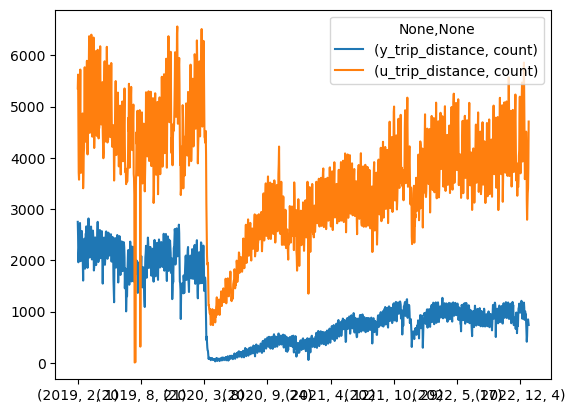

In [17]:
yu_daily.plot(y=[('y_trip_distance','count'),('u_trip_distance','count')])

<AxesSubplot:>

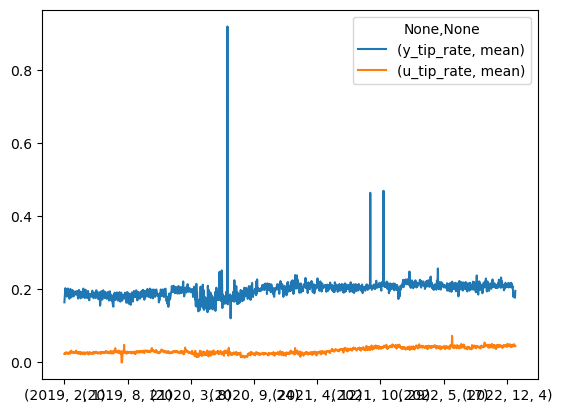

In [18]:
yu_daily.plot(y=[('y_tip_rate','mean'),('u_tip_rate','mean')])

In [19]:
yu_daily.to_parquet('D:/Working_Place/new_uber/data/data_processed/yu_daily.parquet')

In [20]:
yu2_daily = pd.read_parquet('D:/Working_Place/new_uber/data/data_processed/yu_daily.parquet')
display(yu2_daily)

y_trip_distance            y_trip_time y_passenger_count  \
                     count      mean         mean              mean   
2019 2  1             2750  2.202789   826.151273          1.592364   
        2             2475  2.030517   830.600404          1.658182   
        3             1961  2.241831  1038.889342          1.650688   
        4             2132  2.354099   962.244371          1.551595   
        5             2245  2.329073   980.273051          1.544766   
...                    ...       ...          ...               ...   
2022 12 27             788  2.868236  1086.888325          1.576142   
        28             745  3.004886  1110.586577          1.554362   
        29             847  3.204333   994.428571          1.572609   
        30             789  3.254867  1061.802281          1.524715   
        31             738  2.401911   997.543360          1.578591   

           y_fare_amount y_tip_amount y_tip_rate y_airport_fee            \
                    mean         mean       mean           sum      mean   
2019 2  1      11.046240     1.718884   0.164584          0.00  0.000000   
        2      10.053317     1.656477   0.176869          0.00  0.000000   
        3      10.035390     1.742718   0.186619          0.00  0.000000   
        4      11.020028     2.015427   0.203211          0.00  0.000000   
        5      11.221831     2.062454   0.196846          0.00  0.000000   
...                  ...          ...        ...           ...       ...   
2022 12 27     17.184264     2.876282   0.182785         51.25  0.065038   
        28     18.346174     2.931691   0.180200         58.75  0.078859   
        29     18.860685     3.098087   0.188112         78.75  0.092975   
        30     18.969075     2.939975   0.177077         80.00  0.101394   
        31     14.685108     2.550068   0.195966         12.50  0.016938   

           y_average_speed u_trip_distance            u_trip_time  \
                      mean           count      mean         mean   
2019 2  1         9.464558            5353  6.047961  1090.284700   
        2        10.440511            5623  6.161765  1054.228170   
        3        11.903907            4686  6.520610   994.955186   
        4        10.503376            3711  6.759518  1119.391808   
        5        10.109922            3573  6.424544  1079.946544   
...                    ...             ...       ...          ...   
2022 12 27       10.517536            3052  6.591183  1056.344364   
        28       10.258856            3312  6.779874  1116.260870   
        29       10.722198            3404  6.982552  1147.694183   
        30       10.916877            3802  7.144928  1154.491320   
        31       11.579046            4707  6.428453   968.068196   

           u_base_passenger_fare u_tip_amount u_tip_rate u_airport_fee  \
                            mean         mean       mean           sum   
2019 2  1              14.384876     0.343181   0.023346          0.00   
        2              13.443543     0.348508   0.025854          0.00   
        3              13.531995     0.301242   0.023273          0.00   
        4              14.520940     0.363444   0.025879          0.00   
        5              14.469303     0.382105   0.025415          0.00   
...                          ...          ...        ...           ...   
2022 12 27             20.809043     1.049253   0.048361        541.25   
        28             20.926504     1.058433   0.049503        563.75   
        29             21.231824     0.922618   0.044826        518.75   
        30             21.531039     0.965910   0.044688        636.25   
        31             20.679915     0.855052   0.044658        402.50   

                     u_average_speed  
                mean            mean  
2019 2  1   0.000000       18.684011  
        2   0.000000       19.966667  
        3   0.000000       22.144085  
        4   0.000000       20.340868  
   

In [21]:
yellow_hourly = yellow_data_sample.groupby(yellow_data_sample.tpep_pickup_datetime.dt.hour).agg({'y_trip_distance':['count','mean'],
                                                                                                  'y_trip_time':'mean',
                                                                                                  'y_passenger_count':'mean',
                                                                                                  'y_fare_amount':'mean',
                                                                                                  'y_tip_amount':'mean',
                                                                                                   'y_tip_rate':'mean',
                                                                                                  'y_airport_fee':['sum','mean'],
                                                                                                  'y_average_speed':'mean'})

uber_hourly = uber_data_sample.groupby(uber_data_sample.pickup_datetime.dt.hour).agg({'u_trip_distance':['count','mean'],
                                                                                      'u_trip_time':'mean',
                                                                                      'u_base_passenger_fare':'mean',
                                                                                      'u_tip_amount':'mean',
                                                                                       'u_tip_rate':'mean',
                                                                                       'u_airport_fee':['sum','mean'],
                                                                                      'u_average_speed':'mean'})
display(yellow_hourly)
display(uber_hourly)

y_trip_distance            y_trip_time y_passenger_count  \
                               count      mean         mean              mean   
tpep_pickup_datetime                                                            
0                              37912  2.649443   920.489054          1.582691   
1                              25783  2.622419   976.455300          1.566032   
2                              17638  2.581578   867.063839          1.577503   
3                              11631  2.669814   954.355859          1.600034   
4                               7495  2.820379  1036.867245          1.549433   
5                               8449  2.442429   850.515801          1.430110   
6                              24628  2.617806   911.811718          1.412051   
7                              49721  2.553287   993.637819          1.433479   
8                              66040  2.409785   980.614173          1.458222   
9                              70502  2.309996   959.719426          1.462356   
10                             74351  2.331000   983.289667          1.486651   
11                             79372  2.326830   980.430215          1.502104   
12                             85689  2.378776  1013.030739          1.509482   
13                             88334  2.526815  1032.800405          1.517094   
14                             94384  2.778855  1104.921449          1.521105   
15                             96264  2.855928  1147.072467          1.534551   
16                             92396  2.879049  1167.866596          1.529926   
17                            101351  2.703967  1096.735178          1.524030   
18                            107033  2.470831   995.006512          1.528230   
19                             96233  2.336113   919.008178          1.534713   
20                             82231  2.387818   891.698119          1.549027   
21                             78564  2.462414   913.633674          1.569319   
22                             71288  2.573194   901.314415          1.571863   
23                             55057  2.663927   956.323483          1.575549   

                     y_fare_amount y_tip_amount y_tip_rate y_airport_fee  \
                              mean         mean       mean           sum   
tpep_pickup_datetime                                                       
0                        11.441618     2.078529   0.200978        252.50   
1                        10.991412     2.022215   0.202339         93.75   
2                        10.734753     1.988070   0.211660         25.00   
3                        10.910669     1.872258   0.191151         21.25   
4                        11.339151     1.688586   0.167577         10.00   
5                        10.210012     1.536040   0.168332         80.00   
6                        10.709780     1.770651   0.182322        633.75   
7                        11.175009     1.997000   0.195259        967.50   
8                        11.496396     2.123183   0.200143       1106.25   
9                        11.447798     2.073308   0.194721       1166.25   
10                       11.489824     2.017753   0.188865       1375.00   
11                       11.631094     2.034384   0.187346       1387.50   
12                       11.818454     2.050858   0.187472       1667.50   
13                       12.165650     2.099284   0.184686       1952.50   
14                       12.987937     2.194952   0.183599       2667.50   
15                       13.278445     2.263177   0.184225       2785.00   
16                       13.415666     2.387777   0.196319       2867.50   
17                       12.744187     2.338853   0.203291       2676.25   
18                       11.794675     2.246706   0.208951       1950.00   
19                       11.032144     2.142513   0.210963       1310.00   
20                       10.943869     2.120513   0.209045        922.50   
21       

u_trip_distance            u_trip_time u_base_passenger_fare  \
                          count      mean         mean                  mean   
pickup_datetime                                                                
0                        181911  6.287453   890.365338             17.470501   
1                        127107  6.148155   843.519641             16.729658   
2                         88234  6.162750   826.851304             16.850674   
3                         64309  6.443757   829.790200             17.193921   
4                         55112  7.044477   856.963384             18.468217   
5                         66066  7.584012   896.827264             18.092356   
6                        120574  7.780896  1007.716415             19.234082   
7                        196562  6.852384  1065.112509             19.220367   
8                        248302  6.309572  1068.737872             18.587968   
9                        234327  6.297308  1044.073982             17.459931   
10                       218265  6.483600  1051.272710             17.620460   
11                       221587  6.597136  1082.324040             18.190816   
12                       230530  6.708541  1107.328187             18.824774   
13                       243557  6.876925  1143.858715             19.471974   
14                       265725  7.013614  1218.766288             20.332120   
15                       276349  7.041009  1277.022486             20.954919   
16                       284187  6.900111  1285.758363             20.825398   
17                       312592  6.584593  1230.943060             20.374469   
18                       327708  6.354852  1125.480074             19.339735   
19                       317215  6.193468  1030.061482             17.690629   
20                       288795  6.267405   983.361114             17.118367   
21                       272813  6.323828   957.476744             17.206866   
22                       266778  6.459425   956.368883             18.338385   
23                       237370  6.478070   939.104895             18.522655   

                u_tip_amount u_tip_rate u_airport_fee            \
                        mean       mean           sum      mean   
pickup_datetime                                                   
0                   0.502487   0.028394       3646.25  0.020044   
1                   0.449563   0.027476       1301.25  0.010237   
2                   0.423594   0.025925        931.25  0.010554   
3                   0.419544   0.025619       2562.50  0.039847   
4                   0.502835   0.026393       6731.25  0.122138   
5                   0.565820   0.029037      10425.00  0.157797   
6                   0.605199   0.029553      13662.50  0.113312   
7                   0.612983   0.030005      14613.75  0.074347   
8                   0.630624   0.031467      14527.50  0.058507   
9                   0.651381   0.035425      14656.25  0.062546   
10                  0.715561   0.038663      15203.75  0.069657   
11                  0.738113   0.037974      16556.25  0.074717   
12                  0.753911   0.037429      19310.00  0.083764   
13                  0.760621   0.036375      22221.25  0.091236   
14                  0.780473   0.035031      26287.50  0.098927   
15                  0.785789   0.033839      27493.75  0.099489   
16                  0.786953   0.034271      25730.00  0.090539   
17                  0.759612   0.034574      22162.50  0.070899   
18                  0.716516   0.035195      17986.25  0.054885   
19                  0.624826   0.034101      13488.75  0.042522   
20                  0.578812   0.033034       9750.00  0.033761   
21                  0.590920   0.032771       7852.50  0.028783   
22                  0.609586   0.031390       6950.00  0.026052   
23                  0.564377   0.028886       6108.75  0.025735   

                u_average_speed  
           

In [22]:
yu_hourly = pd.concat([yellow_hourly,uber_hourly],axis=1)
yu_hourly

y_trip_distance            y_trip_time y_passenger_count y_fare_amount  \
             count      mean         mean              mean          mean   
0            37912  2.649443   920.489054          1.582691     11.441618   
1            25783  2.622419   976.455300          1.566032     10.991412   
2            17638  2.581578   867.063839          1.577503     10.734753   
3            11631  2.669814   954.355859          1.600034     10.910669   
4             7495  2.820379  1036.867245          1.549433     11.339151   
5             8449  2.442429   850.515801          1.430110     10.210012   
6            24628  2.617806   911.811718          1.412051     10.709780   
7            49721  2.553287   993.637819          1.433479     11.175009   
8            66040  2.409785   980.614173          1.458222     11.496396   
9            70502  2.309996   959.719426          1.462356     11.447798   
10           74351  2.331000   983.289667          1.486651     11.489824   
11           79372  2.326830   980.430215          1.502104     11.631094   
12           85689  2.378776  1013.030739          1.509482     11.818454   
13           88334  2.526815  1032.800405          1.517094     12.165650   
14           94384  2.778855  1104.921449          1.521105     12.987937   
15           96264  2.855928  1147.072467          1.534551     13.278445   
16           92396  2.879049  1167.866596          1.529926     13.415666   
17          101351  2.703967  1096.735178          1.524030     12.744187   
18          107033  2.470831   995.006512          1.528230     11.794675   
19           96233  2.336113   919.008178          1.534713     11.032144   
20           82231  2.387818   891.698119          1.549027     10.943869   
21           78564  2.462414   913.633674          1.569319     11.059115   
22           71288  2.573194   901.314415          1.571863     11.364199   
23           55057  2.663927   956.323483          1.575549     11.512863   

   y_tip_amount y_tip_rate y_airport_fee           y_average_speed  \
           mean       mean           sum      mean            mean   
0      2.078529   0.200978        252.50  0.006660       12.993302   
1      2.022215   0.202339         93.75  0.003636       13.447648   
2      1.988070   0.211660         25.00  0.001417       13.855324   
3      1.872258   0.191151         21.25  0.001827       14.274888   
4      1.688586   0.167577         10.00  0.001334       14.946898   
5      1.536040   0.168332         80.00  0.009469       14.927821   
6      1.770651   0.182322        633.75  0.025733       13.822416   
7      1.997000   0.195259        967.50  0.019459       11.787503   
8      2.123183   0.200143       1106.25  0.016751       10.144741   
9      2.073308   0.194721       1166.25  0.016542        9.873165   
10     2.017753   0.188865       1375.00  0.018493        9.839981   
11     2.034384   0.187346       1387.50  0.017481        9.540881   
12     2.050858   0.187472       1667.50  0.019460        9.479284   
13     2.099284   0.184686       1952.50  0.022104        9.621354   
14     2.194952   0.183599       2667.50  0.028262        9.565812   
15     2.263177   0.184225       2785.00  0.028931        9.503651   
16     2.387777   0.196319       2867.50  0.031035        9.645848   
17     2.338853   0.203291       2676.25  0.026406        9.662191   
18     2.246706   0.208951       1950.00  0.018219        9.925784   
19     2.142513   0.210963       1310.00  0.013613       10.482956   
20     2.120513   0.209045        922.50  0.011218       11.135929   
21     2.165302   0.209916        706.25  0.008989       11.595869   
22     2.197735   0.206626        667.50  0.009363       11.927210   
23     2.179569   0.207581        545.00  0.009899       12.429899   

   u_trip_distance            u_trip_time u_base_passenger_fare u_tip_amount  \
             count      mean         mean                  mean         mean   
0           181911 

<AxesSubplot:>

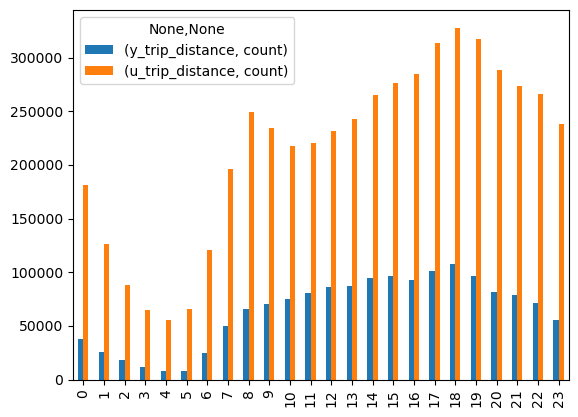

In [106]:
yu_hourly.plot(y=[('y_trip_distance','count'),('u_trip_distance','count')],kind='bar')

<AxesSubplot:>

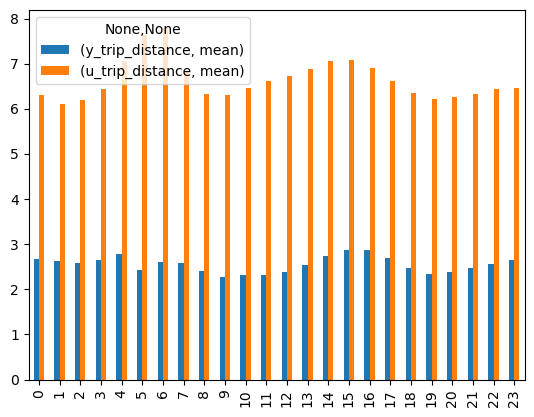

In [109]:
yu_hourly.plot(y=[('y_trip_distance','mean'),('u_trip_distance','mean')],kind='bar')

<AxesSubplot:>

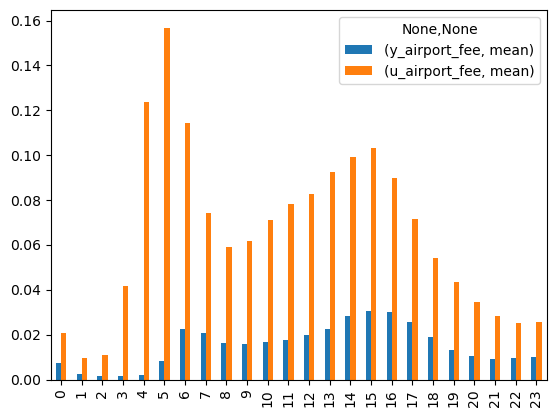

In [110]:
yu_hourly.plot(y=[('y_airport_fee','mean'),('u_airport_fee','mean')],kind='bar')

<AxesSubplot:>

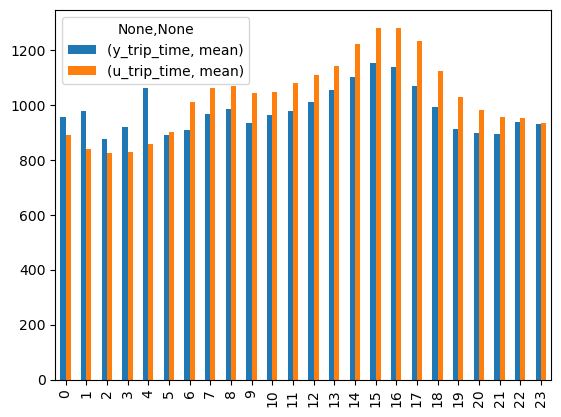

In [112]:
yu_hourly.plot(y=[('y_trip_time','mean'),('u_trip_time','mean')],kind='bar')

<AxesSubplot:>

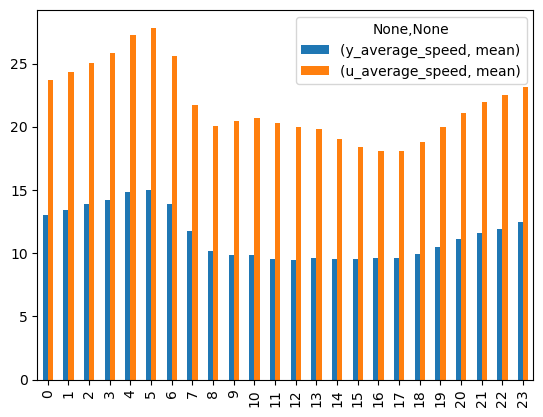

In [113]:
yu_hourly.plot(y=[('y_average_speed','mean'),('u_average_speed','mean')],kind='bar')

In [23]:
yu_hourly.to_parquet('D:/Working_Place/new_uber/data/data_processed/yu_hourly.parquet')

## -3. Grouping by locationID

In [24]:
yellow_PULocation = yellow_data_sample.groupby(yellow_data_sample.PULocationID).agg({'y_trip_distance':['count','mean'],
                                                                                      'y_trip_time':'mean',
                                                                                      'y_passenger_count':'mean',
                                                                                      'y_fare_amount':'mean',
                                                                                      'y_tip_amount':'mean',
                                                                                       'y_tip_rate':'mean',
                                                                                      'y_airport_fee':['sum','mean'],
                                                                                      'y_average_speed':'mean'})

uber_PULocation = uber_data_sample.groupby(uber_data_sample.PULocationID).agg({'u_trip_distance':['count','mean'],
                                                                              'u_trip_time':'mean',
                                                                              'u_base_passenger_fare':'mean',
                                                                              'u_tip_amount':'mean',
                                                                               'u_tip_rate':'mean',
                                                                               'u_airport_fee':['sum','mean'],
                                                                              'u_average_speed':'mean'})
display(yellow_PULocation)
display(uber_PULocation)

y_trip_distance             y_trip_time y_passenger_count  \
                       count       mean         mean              mean   
PULocationID                                                             
1                         28   1.990714   816.821429          1.178571   
3                         16   7.733125  1881.312500          1.625000   
4                       2084   2.473330   994.914587          1.560461   
5                          7  16.817143  6421.285714          1.000000   
6                          1   9.760000  1769.000000          1.000000   
...                      ...        ...          ...               ...   
261                     8060   3.659692  1304.039950          1.650000   
262                    20246   2.091596   829.745283          1.485824   
263                    31797   2.026263   764.678743          1.483379   
264                    11335   3.252873  1135.314248          1.480635   
265                      206   3.824417  1558.000000          1.466019   

             y_fare_amount y_tip_amount y_tip_rate y_airport_fee            \
                      mean         mean       mean           sum      mean   
PULocationID                                                                 
1                76.555000    12.508929   1.565625          0.00  0.000000   
3                28.407500     0.716250   0.013514          0.00  0.000000   
4                11.494410     1.995710   0.184491          0.00  0.000000   
5                79.814286     0.000000   0.000000          0.00  0.000000   
6                31.000000     0.000000   0.000000          0.00  0.000000   
...                    ...          ...        ...           ...       ...   
261              15.629864     2.494753   0.172101          0.00  0.000000   
262              10.070116     1.901911   0.210301          2.50  0.000123   
263               9.672429     1.861254   0.207731          5.00  0.000157   
264              14.294858     2.472712   0.183870        957.50  0.084473   
265              39.801214     4.435340   0.126262          1.25  0.006068   

             y_average_speed  
                        mean  
PULocationID                  
1                   8.042936  
3                  14.361688  
4                  10.995851  
5                  11.629674  
6                  19.862069  
...                      ...  
261                11.659324  
262                11.018492  
263                11.524460  
264                11.089173  
265                10.916583  

[250 rows x 10 columns]

u_trip_distance             u_trip_time u_base_passenger_fare  \
                       count       mean         mean                  mean   
PULocationID                                                                 
1                          1   0.869400   583.000000             18.210000   
2                         13  20.149769  2057.846154             42.265385   
3                      11795   5.984055   860.788046             14.356825   
4                      18012   6.234803  1062.361814             18.387606   
5                       1218   6.870761   782.488506             14.902767   
...                      ...        ...          ...                   ...   
260                    21240   5.717040   905.403766             14.559004   
261                    18275   8.584227  1328.926238             26.641549   
262                    19256   6.606662  1053.315694             19.508963   
263                    26666   7.021356  1094.984100             19.970200   
265                      197   7.062915   909.898477             18.938832   

             u_tip_amount u_tip_rate u_airport_fee           u_average_speed  
                     mean       mean           sum      mean            mean  
PULocationID                                                                  
1                0.000000   0.000000          0.00  0.000000        5.368508  
2                3.027692   0.062347          0.00  0.000000       34.856014  
3                0.231510   0.016871         45.00  0.003815       23.693324  
4                0.571834   0.033455        577.50  0.032062       20.197643  
5                0.675296   0.049729         15.00  0.012315       29.766643  
...                   ...        ...           ...       ...             ...  
260              0.494548   0.034992        661.25  0.031132       21.501930  
261              1.364010   0.050760       1528.75  0.083653       21.891360  
262              0.997940   0.052487        860.00  0.044661       21.547971  
263              0.864613   0.045548       1328.75  0.049829       21.953571  
265              0.349898   0.021072          0.00  0.000000       27.017872  

[262 rows x 9 columns]

In [25]:
taxi_zone = pd.read_csv('D:/Working_Place/new_uber/data/taxi_zone_lookup.csv')
taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [26]:
taxi_zone[taxi_zone.LocationID==1].iloc[0,2]

'Newark Airport'

In [27]:
y_taxi_zone =[]
for i in tqdm(yellow_PULocation.index):
    zone_name = taxi_zone[taxi_zone.LocationID==i].iloc[0,2]
    y_taxi_zone.append(zone_name)
u_taxi_zone = []
for j in tqdm(uber_PULocation.index):
    zone_name = taxi_zone[taxi_zone.LocationID==j].iloc[0,2]
    u_taxi_zone.append(zone_name)

100%|██████████████████████████████████████████████████████████████████████████████| 262/262 [00:00<00:00, 3980.35it/s]


In [28]:
yellow_PULocation = yellow_PULocation.reset_index()
uber_PULocation = uber_PULocation.reset_index(drop=True)

In [29]:
yellow_PULocation.index = y_taxi_zone
uber_PULocation.index = u_taxi_zone

In [30]:
display(yellow_PULocation)
display(uber_PULocation)

PULocationID y_trip_distance             y_trip_time  \
                                               count       mean         mean   
Newark Airport                     1              28   1.990714   816.821429   
Allerton/Pelham Gardens            3              16   7.733125  1881.312500   
Alphabet City                      4            2084   2.473330   994.914587   
Arden Heights                      5               7  16.817143  6421.285714   
Arrochar/Fort Wadsworth            6               1   9.760000  1769.000000   
...                              ...             ...        ...          ...   
World Trade Center               261            8060   3.659692  1304.039950   
Yorkville East                   262           20246   2.091596   829.745283   
Yorkville West                   263           31797   2.026263   764.678743   
NV                               264           11335   3.252873  1135.314248   
NaN                              265             206   3.824417  1558.000000   

                        y_passenger_count y_fare_amount y_tip_amount  \
                                     mean          mean         mean   
Newark Airport                   1.178571     76.555000    12.508929   
Allerton/Pelham Gardens          1.625000     28.407500     0.716250   
Alphabet City                    1.560461     11.494410     1.995710   
Arden Heights                    1.000000     79.814286     0.000000   
Arrochar/Fort Wadsworth          1.000000     31.000000     0.000000   
...                                   ...           ...          ...   
World Trade Center               1.650000     15.629864     2.494753   
Yorkville East                   1.485824     10.070116     1.901911   
Yorkville West                   1.483379      9.672429     1.861254   
NV                               1.480635     14.294858     2.472712   
NaN                              1.466019     39.801214     4.435340   

                        y_tip_rate y_airport_fee           y_average_speed  
                              mean           sum      mean            mean  
Newark Airport            1.565625          0.00  0.000000        8.042936  
Allerton/Pelham Gardens   0.013514          0.00  0.000000       14.361688  
Alphabet City             0.184491          0.00  0.000000       10.995851  
Arden Heights             0.000000          0.00  0.000000       11.629674  
Arrochar/Fort Wadsworth   0.000000          0.00  0.000000       19.862069  
...                            ...           ...       ...             ...  
World Trade Center        0.172101          0.00  0.000000       11.659324  
Yorkville East            0.210301          2.50  0.000123       11.018492  
Yorkville West            0.207731          5.00  0.000157       11.524460  
NV                        0.183870        957.50  0.084473       11.089173  
NaN                       0.126262          1.25  0.006068       10.916583  

[250 rows x 11 columns]

u_trip_distance             u_trip_time  \
                                  count       mean         mean   
Newark Airport                        1   0.869400   583.000000   
Jamaica Bay                          13  20.149769  2057.846154   
Allerton/Pelham Gardens           11795   5.984055   860.788046   
Alphabet City                     18012   6.234803  1062.361814   
Arden Heights                      1218   6.870761   782.488506   
...                                 ...        ...          ...   
Woodside                          21240   5.717040   905.403766   
World Trade Center                18275   8.584227  1328.926238   
Yorkville East                    19256   6.606662  1053.315694   
Yorkville West                    26666   7.021356  1094.984100   
NaN                                 197   7.062915   909.898477   

                        u_base_passenger_fare u_tip_amount u_tip_rate  \
                                         mean         mean       mean   
Newark Airport                      18.210000     0.000000   0.000000   
Jamaica Bay                         42.265385     3.027692   0.062347   
Allerton/Pelham Gardens             14.356825     0.231510   0.016871   
Alphabet City                       18.387606     0.571834   0.033455   
Arden Heights                       14.902767     0.675296   0.049729   
...                                       ...          ...        ...   
Woodside                            14.559004     0.494548   0.034992   
World Trade Center                  26.641549     1.364010   0.050760   
Yorkville East                      19.508963     0.997940   0.052487   
Yorkville West                      19.970200     0.864613   0.045548   
NaN                                 18.938832     0.349898   0.021072   

                        u_airport_fee           u_average_speed  
                                  sum      mean            mean  
Newark Airport                   0.00  0.000000        5.368508  
Jamaica Bay                      0.00  0.000000       34.856014  
Allerton/Pelham Gardens         45.00  0.003815       23.693324  
Alphabet City                  577.50  0.032062       20.197643  
Arden Heights                   15.00  0.012315       29.766643  
...                               ...       ...             ...  
Woodside                       661.25  0.031132       21.501930  
World Trade Center            1528.75  0.083653       21.891360  
Yorkville East                 860.00  0.044661       21.547971  
Yorkville West                1328.75  0.049829       21.953571  
NaN                              0.00  0.000000       27.017872  

[262 rows x 9 columns]

In [31]:
for i in yellow_PULocation.index:
    if i not in uber_PULocation.index:
        print(i)
print()

a=[]
for j in uber_PULocation.index:
    if j not in yellow_PULocation.index:
        print(j)
        a.append(j)

NV

Jamaica Bay
Breezy Point/Fort Tilden/Riis Beach
Broad Channel
Eltingville/Annadale/Prince's Bay
Freshkills Park
Great Kills Park
Mariners Harbor
New Dorp/Midland Beach
Oakwood
Pelham Bay Park
Port Richmond
Rossville/Woodrow
Westerleigh


In [32]:
b=0
for i in a:
    print(uber_PULocation.loc[i,('u_trip_distance','count')]/uber_PULocation[('u_trip_distance','count')].sum()*100)
    b+=uber_PULocation.loc[i,('u_trip_distance','count')]/uber_PULocation[('u_trip_distance','count')].sum()*100
print()
print(b)

0.0002526246240994175
0.00888072717026414
0.0046638392141430925
0.04016731523180739
0.0018849683490494997
0.0001360286437458402
0.10884234766006443
0.05651018514470047
0.03486219812571962
0.022172668930571952
0.057384654997352305
0.018869116153887262
0.06809205252648914

0.42271872677189454


In [33]:
yellow_PULocation.drop(['NV'],axis=0,inplace=True)
uber_PULocation.drop(a,axis=0,inplace=True)

In [34]:
display(yellow_PULocation)
display(uber_PULocation)

PULocationID y_trip_distance             y_trip_time  \
                                               count       mean         mean   
Newark Airport                     1              28   1.990714   816.821429   
Allerton/Pelham Gardens            3              16   7.733125  1881.312500   
Alphabet City                      4            2084   2.473330   994.914587   
Arden Heights                      5               7  16.817143  6421.285714   
Arrochar/Fort Wadsworth            6               1   9.760000  1769.000000   
...                              ...             ...        ...          ...   
Woodside                         260             507   3.304793   989.199211   
World Trade Center               261            8060   3.659692  1304.039950   
Yorkville East                   262           20246   2.091596   829.745283   
Yorkville West                   263           31797   2.026263   764.678743   
NaN                              265             206   3.824417  1558.000000   

                        y_passenger_count y_fare_amount y_tip_amount  \
                                     mean          mean         mean   
Newark Airport                   1.178571     76.555000    12.508929   
Allerton/Pelham Gardens          1.625000     28.407500     0.716250   
Alphabet City                    1.560461     11.494410     1.995710   
Arden Heights                    1.000000     79.814286     0.000000   
Arrochar/Fort Wadsworth          1.000000     31.000000     0.000000   
...                                   ...           ...          ...   
Woodside                         1.520710     16.333452     1.546114   
World Trade Center               1.650000     15.629864     2.494753   
Yorkville East                   1.485824     10.070116     1.901911   
Yorkville West                   1.483379      9.672429     1.861254   
NaN                              1.466019     39.801214     4.435340   

                        y_tip_rate y_airport_fee           y_average_speed  
                              mean           sum      mean            mean  
Newark Airport            1.565625          0.00  0.000000        8.042936  
Allerton/Pelham Gardens   0.013514          0.00  0.000000       14.361688  
Alphabet City             0.184491          0.00  0.000000       10.995851  
Arden Heights             0.000000          0.00  0.000000       11.629674  
Arrochar/Fort Wadsworth   0.000000          0.00  0.000000       19.862069  
...                            ...           ...       ...             ...  
Woodside                  0.077074         10.00  0.019724       12.781670  
World Trade Center        0.172101          0.00  0.000000       11.659324  
Yorkville East            0.210301          2.50  0.000123       11.018492  
Yorkville West            0.207731          5.00  0.000157       11.524460  
NaN                       0.126262          1.25  0.006068       10.916583  

[249 rows x 11 columns]

u_trip_distance            u_trip_time  \
                                  count      mean         mean   
Newark Airport                        1  0.869400   583.000000   
Allerton/Pelham Gardens           11795  5.984055   860.788046   
Alphabet City                     18012  6.234803  1062.361814   
Arden Heights                      1218  6.870761   782.488506   
Arrochar/Fort Wadsworth            2389  7.232600   900.517790   
...                                 ...       ...          ...   
Woodside                          21240  5.717040   905.403766   
World Trade Center                18275  8.584227  1328.926238   
Yorkville East                    19256  6.606662  1053.315694   
Yorkville West                    26666  7.021356  1094.984100   
NaN                                 197  7.062915   909.898477   

                        u_base_passenger_fare u_tip_amount u_tip_rate  \
                                         mean         mean       mean   
Newark Airport                      18.210000     0.000000   0.000000   
Allerton/Pelham Gardens             14.356825     0.231510   0.016871   
Alphabet City                       18.387606     0.571834   0.033455   
Arden Heights                       14.902767     0.675296   0.049729   
Arrochar/Fort Wadsworth             16.195295     0.645730   0.041771   
...                                       ...          ...        ...   
Woodside                            14.559004     0.494548   0.034992   
World Trade Center                  26.641549     1.364010   0.050760   
Yorkville East                      19.508963     0.997940   0.052487   
Yorkville West                      19.970200     0.864613   0.045548   
NaN                                 18.938832     0.349898   0.021072   

                        u_airport_fee           u_average_speed  
                                  sum      mean            mean  
Newark Airport                   0.00  0.000000        5.368508  
Allerton/Pelham Gardens         45.00  0.003815       23.693324  
Alphabet City                  577.50  0.032062       20.197643  
Arden Heights                   15.00  0.012315       29.766643  
Arrochar/Fort Wadsworth         32.50  0.013604       27.712729  
...                               ...       ...             ...  
Woodside                       661.25  0.031132       21.501930  
World Trade Center            1528.75  0.083653       21.891360  
Yorkville East                 860.00  0.044661       21.547971  
Yorkville West                1328.75  0.049829       21.953571  
NaN                              0.00  0.000000       27.017872  

[249 rows x 9 columns]

In [35]:
yu_PULocation = pd.concat([yellow_PULocation,uber_PULocation],axis=1)
yu_PULocation

PULocationID y_trip_distance             y_trip_time  \
                                               count       mean         mean   
Newark Airport                     1              28   1.990714   816.821429   
Allerton/Pelham Gardens            3              16   7.733125  1881.312500   
Alphabet City                      4            2084   2.473330   994.914587   
Arden Heights                      5               7  16.817143  6421.285714   
Arrochar/Fort Wadsworth            6               1   9.760000  1769.000000   
...                              ...             ...        ...          ...   
Woodside                         260             507   3.304793   989.199211   
World Trade Center               261            8060   3.659692  1304.039950   
Yorkville East                   262           20246   2.091596   829.745283   
Yorkville West                   263           31797   2.026263   764.678743   
NaN                              265             206   3.824417  1558.000000   

                        y_passenger_count y_fare_amount y_tip_amount  \
                                     mean          mean         mean   
Newark Airport                   1.178571     76.555000    12.508929   
Allerton/Pelham Gardens          1.625000     28.407500     0.716250   
Alphabet City                    1.560461     11.494410     1.995710   
Arden Heights                    1.000000     79.814286     0.000000   
Arrochar/Fort Wadsworth          1.000000     31.000000     0.000000   
...                                   ...           ...          ...   
Woodside                         1.520710     16.333452     1.546114   
World Trade Center               1.650000     15.629864     2.494753   
Yorkville East                   1.485824     10.070116     1.901911   
Yorkville West                   1.483379      9.672429     1.861254   
NaN                              1.466019     39.801214     4.435340   

                        y_tip_rate y_airport_fee           y_average_speed  \
                              mean           sum      mean            mean   
Newark Airport            1.565625          0.00  0.000000        8.042936   
Allerton/Pelham Gardens   0.013514          0.00  0.000000       14.361688   
Alphabet City             0.184491          0.00  0.000000       10.995851   
Arden Heights             0.000000          0.00  0.000000       11.629674   
Arrochar/Fort Wadsworth   0.000000          0.00  0.000000       19.862069   
...                            ...           ...       ...             ...   
Woodside                  0.077074         10.00  0.019724       12.781670   
World Trade Center        0.172101          0.00  0.000000       11.659324   
Yorkville East            0.210301          2.50  0.000123       11.018492   
Yorkville West            0.207731          5.00  0.000157       11.524460   
NaN                       0.126262          1.25  0.006068       10.916583   

                        u_trip_distance            u_trip_time  \
                                  count      mean         mean   
Newark Airport                        1  0.869400   583.000000   
Allerton/Pelham Gardens           11795  5.984055   860.788046   
Alphabet City                     18012  6.234803  1062.361814   
Arden Heights                      1218  6.870761   782.488506   
Arrochar/Fort Wadsworth            2389  7.232600   900.517790   
...                                 ...       ...          ...   
Woodside                          21240  5.717040   905.403766   
World Trade Center                18275  8.584227  1328.926238   
Yorkville East                    19256  6.606662  1053.315694   
Yorkville West                    26666  7.021356  1094.984100   
NaN                                 197  7.062915   909.898477   

                        u_base_passenger_fare u_tip_amount u_tip_rate  \
                                         mean         mean       mean   
Newark Airport            

In [36]:
yu_PULocation.columns

MultiIndex([(         'PULocationID',      ''),
            (      'y_trip_distance', 'count'),
            (      'y_trip_distance',  'mean'),
            (          'y_trip_time',  'mean'),
            (    'y_passenger_count',  'mean'),
            (        'y_fare_amount',  'mean'),
            (         'y_tip_amount',  'mean'),
            (           'y_tip_rate',  'mean'),
            (        'y_airport_fee',   'sum'),
            (        'y_airport_fee',  'mean'),
            (      'y_average_speed',  'mean'),
            (      'u_trip_distance', 'count'),
            (      'u_trip_distance',  'mean'),
            (          'u_trip_time',  'mean'),
            ('u_base_passenger_fare',  'mean'),
            (         'u_tip_amount',  'mean'),
            (           'u_tip_rate',  'mean'),
            (        'u_airport_fee',   'sum'),
            (        'u_airport_fee',  'mean'),
            (      'u_average_speed',  'mean')],
           )

<AxesSubplot:>

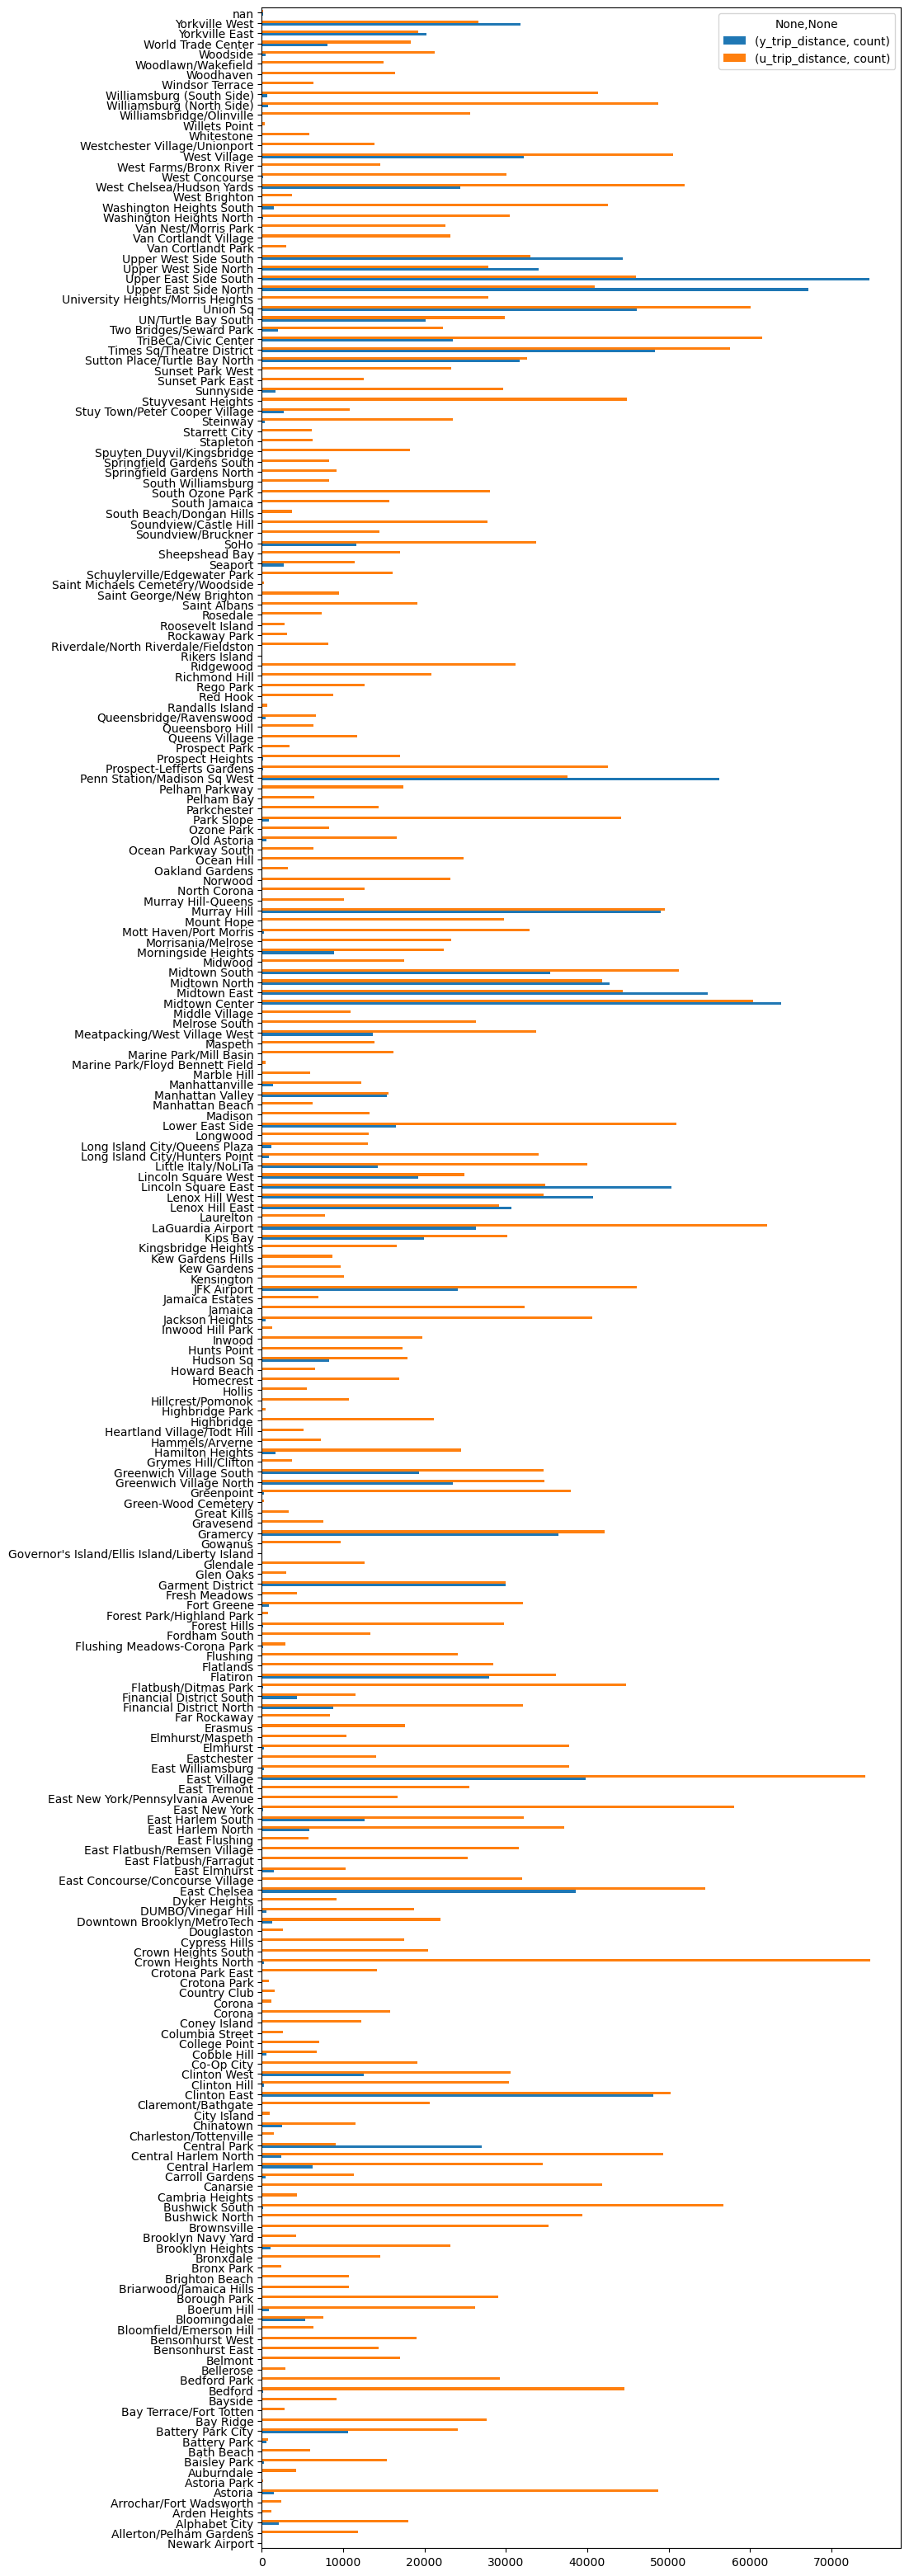

In [37]:
yu_PULocation.plot(y=[('y_trip_distance','count'),('u_trip_distance','count')],kind='barh',figsize=(10,40))

In [38]:
yu_PULocation.loc['Lincoln Square East']['y_trip_distance','count'],yu_PULocation.loc['Lincoln Square East']['u_trip_distance','count']

(50324.0, 34841.0)

In [39]:
yu_PULocation.to_parquet('D:/Working_Place/new_uber/data/data_processed/yu_PULocation.parquet')

In [40]:
yellow_DOLocation = yellow_data_sample.groupby(yellow_data_sample.DOLocationID).agg({'y_trip_distance':['count','mean'],
                                                                                      'y_trip_time':'mean',
                                                                                      'y_passenger_count':'mean',
                                                                                      'y_fare_amount':'mean',
                                                                                      'y_tip_amount':'mean',
                                                                                       'y_tip_rate':'mean',
                                                                                      'y_airport_fee':['sum','mean'],
                                                                                      'y_average_speed':'mean'})

uber_DOLocation = uber_data_sample.groupby(uber_data_sample.DOLocationID).agg({'u_trip_distance':['count','mean'],
                                                                              'u_trip_time':'mean',
                                                                              'u_base_passenger_fare':'mean',
                                                                              'u_tip_amount':'mean',
                                                                               'u_tip_rate':'mean',
                                                                               'u_airport_fee':['sum','mean'],
                                                                              'u_average_speed':'mean'})
display(yellow_DOLocation)
display(uber_DOLocation)

y_trip_distance             y_trip_time y_passenger_count  \
                       count       mean         mean              mean   
DOLocationID                                                             
1                        984  16.903547  4512.540650          1.639228   
2                          1   2.380000  1473.000000          1.000000   
3                         35   9.032000  2012.542857          1.657143   
4                       6499   2.389254   914.161871          1.530082   
5                          8  14.876250  4505.125000          1.125000   
...                      ...        ...          ...               ...   
261                     6416   3.981359  1398.401185          1.600374   
262                    22414   2.191207   854.065272          1.488311   
263                    31951   2.079437   762.092172          1.505117   
264                     8099   2.485888  1108.619706          1.573528   
265                     1367  10.637681  3726.437454          1.526701   

             y_fare_amount y_tip_amount y_tip_rate y_airport_fee            \
                      mean         mean       mean           sum      mean   
DOLocationID                                                                 
1                76.357459    12.576189   0.207548         18.75  0.019055   
2                16.000000     1.950000   0.121875          0.00  0.000000   
3                30.714571     1.928286   0.049009          5.00  0.142857   
4                11.161968     1.939526   0.180372         68.75  0.010579   
5                64.037500     0.000000   0.000000          0.00  0.000000   
...                    ...          ...        ...           ...       ...   
261              16.128956     2.690821   0.176427        128.75  0.020067   
262              10.334696     2.048362   0.209106        180.00  0.008031   
263               9.703911     1.964616   0.214817        182.50  0.005712   
264              12.441119     2.027723   0.179468         75.00  0.009260   
265              58.636554     7.211280   0.133583        297.50  0.217630   

             y_average_speed  
                        mean  
DOLocationID                  
1                  17.653377  
2                   5.816701  
3                  15.023779  
4                  10.894942  
5                  13.798412  
...                      ...  
261                12.080285  
262                11.104524  
263                11.906633  
264                10.464015  
265                15.695251  

[259 rows x 10 columns]

u_trip_distance             u_trip_time u_base_passenger_fare  \
                       count       mean         mean                  mean   
DOLocationID                                                                 
1                      15952  27.046207  3043.208438             70.140748   
2                         12   8.554467  1364.583333             18.945000   
3                      11186   5.629002   817.656535             13.739313   
4                      15214   6.020885  1024.469173             17.180041   
5                       1120   6.586898   792.999107             14.672964   
...                      ...        ...          ...                   ...   
260                    22136   5.502164   844.718829             14.316595   
261                    17692   7.923320  1228.967160             23.623225   
262                    16916   6.515189  1067.156361             19.680137   
263                    26640   6.454088  1034.017342             19.130303   
265                   110225  16.965839  1983.821719             44.446467   

             u_tip_amount u_tip_rate u_airport_fee           u_average_speed  
                     mean       mean           sum      mean            mean  
DOLocationID                                                                  
1                3.788988   0.054495       22805.0  1.429601       34.315667  
2                0.422500   0.023450           0.0  0.000000       29.906873  
3                0.206833   0.015353          65.0  0.005811       23.215758  
4                0.522020   0.031543         392.5  0.025799       20.452607  
5                0.859777   0.058689           2.5  0.002232       29.089628  
...                   ...        ...           ...       ...             ...  
260              0.478505   0.036005         507.5  0.022926       21.902357  
261              1.147386   0.050086         945.0  0.053414       22.347281  
262              0.899407   0.048531         610.0  0.036061       21.150218  
263              0.844898   0.046610         920.0  0.034535       21.694043  
265              1.918556   0.038642       10160.0  0.092175       30.286164  

[262 rows x 9 columns]

In [41]:
for i in yellow_DOLocation.index:
    if i not in uber_DOLocation.index:
        print(i)
print()

a=[]
for j in uber_DOLocation.index:
    if j not in yellow_DOLocation.index:
        print(j)
        a.append(j)

264

99
110
199
204


In [42]:
yellow_DOLocation.drop([264],axis=0,inplace=True)
uber_DOLocation.drop(a,axis=0,inplace=True)

In [43]:
display(yellow_DOLocation)
display(uber_DOLocation)

y_trip_distance             y_trip_time y_passenger_count  \
                       count       mean         mean              mean   
DOLocationID                                                             
1                        984  16.903547  4512.540650          1.639228   
2                          1   2.380000  1473.000000          1.000000   
3                         35   9.032000  2012.542857          1.657143   
4                       6499   2.389254   914.161871          1.530082   
5                          8  14.876250  4505.125000          1.125000   
...                      ...        ...          ...               ...   
260                     1273   4.785546  1540.802042          1.527887   
261                     6416   3.981359  1398.401185          1.600374   
262                    22414   2.191207   854.065272          1.488311   
263                    31951   2.079437   762.092172          1.505117   
265                     1367  10.637681  3726.437454          1.526701   

             y_fare_amount y_tip_amount y_tip_rate y_airport_fee            \
                      mean         mean       mean           sum      mean   
DOLocationID                                                                 
1                76.357459    12.576189   0.207548         18.75  0.019055   
2                16.000000     1.950000   0.121875          0.00  0.000000   
3                30.714571     1.928286   0.049009          5.00  0.142857   
4                11.161968     1.939526   0.180372         68.75  0.010579   
5                64.037500     0.000000   0.000000          0.00  0.000000   
...                    ...          ...        ...           ...       ...   
260              18.246269     1.707227   0.092904        103.75  0.081500   
261              16.128956     2.690821   0.176427        128.75  0.020067   
262              10.334696     2.048362   0.209106        180.00  0.008031   
263               9.703911     1.964616   0.214817        182.50  0.005712   
265              58.636554     7.211280   0.133583        297.50  0.217630   

             y_average_speed  
                        mean  
DOLocationID                  
1                  17.653377  
2                   5.816701  
3                  15.023779  
4                  10.894942  
5                  13.798412  
...                      ...  
260                14.175017  
261                12.080285  
262                11.104524  
263                11.906633  
265                15.695251  

[258 rows x 10 columns]

u_trip_distance             u_trip_time u_base_passenger_fare  \
                       count       mean         mean                  mean   
DOLocationID                                                                 
1                      15952  27.046207  3043.208438             70.140748   
2                         12   8.554467  1364.583333             18.945000   
3                      11186   5.629002   817.656535             13.739313   
4                      15214   6.020885  1024.469173             17.180041   
5                       1120   6.586898   792.999107             14.672964   
...                      ...        ...          ...                   ...   
260                    22136   5.502164   844.718829             14.316595   
261                    17692   7.923320  1228.967160             23.623225   
262                    16916   6.515189  1067.156361             19.680137   
263                    26640   6.454088  1034.017342             19.130303   
265                   110225  16.965839  1983.821719             44.446467   

             u_tip_amount u_tip_rate u_airport_fee           u_average_speed  
                     mean       mean           sum      mean            mean  
DOLocationID                                                                  
1                3.788988   0.054495       22805.0  1.429601       34.315667  
2                0.422500   0.023450           0.0  0.000000       29.906873  
3                0.206833   0.015353          65.0  0.005811       23.215758  
4                0.522020   0.031543         392.5  0.025799       20.452607  
5                0.859777   0.058689           2.5  0.002232       29.089628  
...                   ...        ...           ...       ...             ...  
260              0.478505   0.036005         507.5  0.022926       21.902357  
261              1.147386   0.050086         945.0  0.053414       22.347281  
262              0.899407   0.048531         610.0  0.036061       21.150218  
263              0.844898   0.046610         920.0  0.034535       21.694043  
265              1.918556   0.038642       10160.0  0.092175       30.286164  

[258 rows x 9 columns]

In [44]:
yu_DOLocation = pd.concat([yellow_DOLocation,uber_DOLocation],axis=1)
display(yu_DOLocation)

y_trip_distance             y_trip_time y_passenger_count  \
                       count       mean         mean              mean   
DOLocationID                                                             
1                        984  16.903547  4512.540650          1.639228   
2                          1   2.380000  1473.000000          1.000000   
3                         35   9.032000  2012.542857          1.657143   
4                       6499   2.389254   914.161871          1.530082   
5                          8  14.876250  4505.125000          1.125000   
...                      ...        ...          ...               ...   
260                     1273   4.785546  1540.802042          1.527887   
261                     6416   3.981359  1398.401185          1.600374   
262                    22414   2.191207   854.065272          1.488311   
263                    31951   2.079437   762.092172          1.505117   
265                     1367  10.637681  3726.437454          1.526701   

             y_fare_amount y_tip_amount y_tip_rate y_airport_fee            \
                      mean         mean       mean           sum      mean   
DOLocationID                                                                 
1                76.357459    12.576189   0.207548         18.75  0.019055   
2                16.000000     1.950000   0.121875          0.00  0.000000   
3                30.714571     1.928286   0.049009          5.00  0.142857   
4                11.161968     1.939526   0.180372         68.75  0.010579   
5                64.037500     0.000000   0.000000          0.00  0.000000   
...                    ...          ...        ...           ...       ...   
260              18.246269     1.707227   0.092904        103.75  0.081500   
261              16.128956     2.690821   0.176427        128.75  0.020067   
262              10.334696     2.048362   0.209106        180.00  0.008031   
263               9.703911     1.964616   0.214817        182.50  0.005712   
265              58.636554     7.211280   0.133583        297.50  0.217630   

             y_average_speed u_trip_distance             u_trip_time  \
                        mean           count       mean         mean   
DOLocationID                                                           
1                  17.653377           15952  27.046207  3043.208438   
2                   5.816701              12   8.554467  1364.583333   
3                  15.023779           11186   5.629002   817.656535   
4                  10.894942           15214   6.020885  1024.469173   
5                  13.798412            1120   6.586898   792.999107   
...                      ...             ...        ...          ...   
260                14.175017           22136   5.502164   844.718829   
261                12.080285           17692   7.923320  1228.967160   
262                11.104524           16916   6.515189  1067.156361   
263                11.906633           26640   6.454088  1034.017342   
265                15.695251          110225  16.965839  1983.821719   

             u_base_passenger_fare u_tip_amount u_tip_rate u_airport_fee  \
                              mean         mean       mean           sum   
DOLocationID                                                               
1                        70.140748     3.788988   0.054495       22805.0   
2                        18.945000     0.422500   0.023450           0.0   
3                        13.739313     0.206833   0.015353          65.0   
4                        17.180041     0.522020   0.031543         392.5   
5                        14.672964     0.859777   0.058689           2.5   
...                            ...          ...        ...           ...   
260                      14.316595     0.478505   0.036005         507.5   
261                      23.623225     1.147386   0.050086         945.0   
262                      19.680137    

In [45]:
yu_taxi_zone = []
for i in tqdm(yu_DOLocation.index):
    zone_name = taxi_zone[taxi_zone.LocationID==i].iloc[0,2]
    yu_taxi_zone.append(zone_name)

100%|██████████████████████████████████████████████████████████████████████████████| 258/258 [00:00<00:00, 3802.70it/s]


In [46]:
yu_DOLocation.index = yu_taxi_zone
display(yu_DOLocation)

y_trip_distance             y_trip_time  \
                                  count       mean         mean   
Newark Airport                      984  16.903547  4512.540650   
Jamaica Bay                           1   2.380000  1473.000000   
Allerton/Pelham Gardens              35   9.032000  2012.542857   
Alphabet City                      6499   2.389254   914.161871   
Arden Heights                         8  14.876250  4505.125000   
...                                 ...        ...          ...   
Woodside                           1273   4.785546  1540.802042   
World Trade Center                 6416   3.981359  1398.401185   
Yorkville East                    22414   2.191207   854.065272   
Yorkville West                    31951   2.079437   762.092172   
NaN                                1367  10.637681  3726.437454   

                        y_passenger_count y_fare_amount y_tip_amount  \
                                     mean          mean         mean   
Newark Airport                   1.639228     76.357459    12.576189   
Jamaica Bay                      1.000000     16.000000     1.950000   
Allerton/Pelham Gardens          1.657143     30.714571     1.928286   
Alphabet City                    1.530082     11.161968     1.939526   
Arden Heights                    1.125000     64.037500     0.000000   
...                                   ...           ...          ...   
Woodside                         1.527887     18.246269     1.707227   
World Trade Center               1.600374     16.128956     2.690821   
Yorkville East                   1.488311     10.334696     2.048362   
Yorkville West                   1.505117      9.703911     1.964616   
NaN                              1.526701     58.636554     7.211280   

                        y_tip_rate y_airport_fee           y_average_speed  \
                              mean           sum      mean            mean   
Newark Airport            0.207548         18.75  0.019055       17.653377   
Jamaica Bay               0.121875          0.00  0.000000        5.816701   
Allerton/Pelham Gardens   0.049009          5.00  0.142857       15.023779   
Alphabet City             0.180372         68.75  0.010579       10.894942   
Arden Heights             0.000000          0.00  0.000000       13.798412   
...                            ...           ...       ...             ...   
Woodside                  0.092904        103.75  0.081500       14.175017   
World Trade Center        0.176427        128.75  0.020067       12.080285   
Yorkville East            0.209106        180.00  0.008031       11.104524   
Yorkville West            0.214817        182.50  0.005712       11.906633   
NaN                       0.133583        297.50  0.217630       15.695251   

                        u_trip_distance             u_trip_time  \
                                  count       mean         mean   
Newark Airport                    15952  27.046207  3043.208438   
Jamaica Bay                          12   8.554467  1364.583333   
Allerton/Pelham Gardens           11186   5.629002   817.656535   
Alphabet City                     15214   6.020885  1024.469173   
Arden Heights                      1120   6.586898   792.999107   
...                                 ...        ...          ...   
Woodside                          22136   5.502164   844.718829   
World Trade Center                17692   7.923320  1228.967160   
Yorkville East                    16916   6.515189  1067.156361   
Yorkville West                    26640   6.454088  1034.017342   
NaN                              110225  16.965839  1983.821719   

                        u_base_passenger_fare u_tip_amount u_tip_rate  \
                                         mean         mean       mean   
Newark Airport                      70.140748     3.788988   0.054495   
Jamaica Bay                         18.945000     0.422500   0.023450   
Allerton/Pelham Gardens             

<AxesSubplot:>

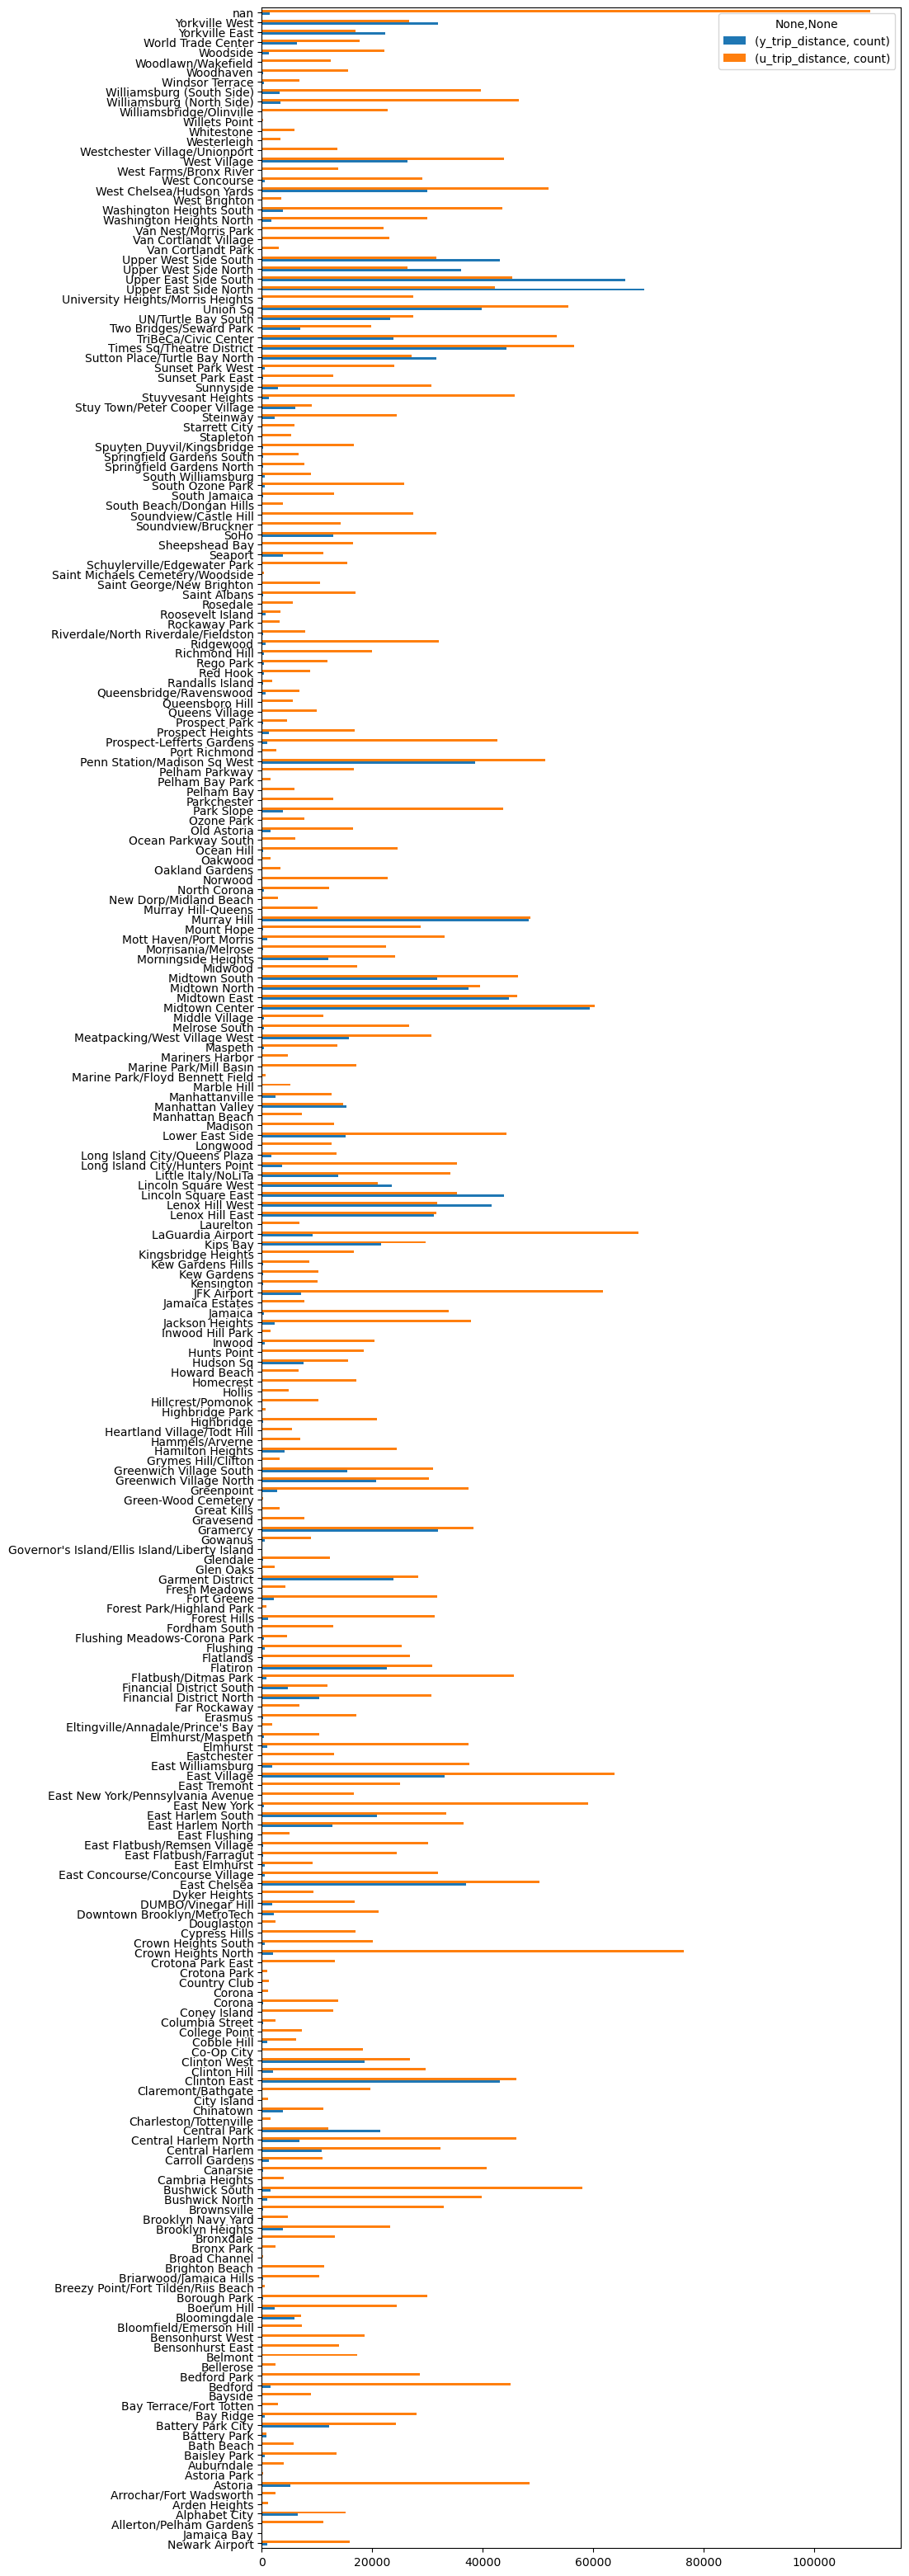

In [47]:
yu_DOLocation.plot(y=[('y_trip_distance','count'),('u_trip_distance','count')],kind='barh',figsize=(10,40))

In [48]:
yu_DOLocation.to_parquet('D:/Working_Place/new_uber/data/data_processed/yu_DOLocation.parquet')

# 2. Descriptive Graphs

In [49]:
yu_daily = pd.read_parquet('../data/data_processed/yu_daily.parquet')
yu_hourly = pd.read_parquet('../data/data_processed/yu_hourly.parquet')
yu_DOLocation = pd.read_parquet('../data/data_processed/yu_DOLocation.parquet')
yu_PULocation = pd.read_parquet('../data/data_processed/yu_PULocation.parquet')
display(yu_hourly)

y_trip_distance            y_trip_time y_passenger_count y_fare_amount  \
             count      mean         mean              mean          mean   
0            37912  2.649443   920.489054          1.582691     11.441618   
1            25783  2.622419   976.455300          1.566032     10.991412   
2            17638  2.581578   867.063839          1.577503     10.734753   
3            11631  2.669814   954.355859          1.600034     10.910669   
4             7495  2.820379  1036.867245          1.549433     11.339151   
5             8449  2.442429   850.515801          1.430110     10.210012   
6            24628  2.617806   911.811718          1.412051     10.709780   
7            49721  2.553287   993.637819          1.433479     11.175009   
8            66040  2.409785   980.614173          1.458222     11.496396   
9            70502  2.309996   959.719426          1.462356     11.447798   
10           74351  2.331000   983.289667          1.486651     11.489824   
11           79372  2.326830   980.430215          1.502104     11.631094   
12           85689  2.378776  1013.030739          1.509482     11.818454   
13           88334  2.526815  1032.800405          1.517094     12.165650   
14           94384  2.778855  1104.921449          1.521105     12.987937   
15           96264  2.855928  1147.072467          1.534551     13.278445   
16           92396  2.879049  1167.866596          1.529926     13.415666   
17          101351  2.703967  1096.735178          1.524030     12.744187   
18          107033  2.470831   995.006512          1.528230     11.794675   
19           96233  2.336113   919.008178          1.534713     11.032144   
20           82231  2.387818   891.698119          1.549027     10.943869   
21           78564  2.462414   913.633674          1.569319     11.059115   
22           71288  2.573194   901.314415          1.571863     11.364199   
23           55057  2.663927   956.323483          1.575549     11.512863   

   y_tip_amount y_tip_rate y_airport_fee           y_average_speed  \
           mean       mean           sum      mean            mean   
0      2.078529   0.200978        252.50  0.006660       12.993302   
1      2.022215   0.202339         93.75  0.003636       13.447648   
2      1.988070   0.211660         25.00  0.001417       13.855324   
3      1.872258   0.191151         21.25  0.001827       14.274888   
4      1.688586   0.167577         10.00  0.001334       14.946898   
5      1.536040   0.168332         80.00  0.009469       14.927821   
6      1.770651   0.182322        633.75  0.025733       13.822416   
7      1.997000   0.195259        967.50  0.019459       11.787503   
8      2.123183   0.200143       1106.25  0.016751       10.144741   
9      2.073308   0.194721       1166.25  0.016542        9.873165   
10     2.017753   0.188865       1375.00  0.018493        9.839981   
11     2.034384   0.187346       1387.50  0.017481        9.540881   
12     2.050858   0.187472       1667.50  0.019460        9.479284   
13     2.099284   0.184686       1952.50  0.022104        9.621354   
14     2.194952   0.183599       2667.50  0.028262        9.565812   
15     2.263177   0.184225       2785.00  0.028931        9.503651   
16     2.387777   0.196319       2867.50  0.031035        9.645848   
17     2.338853   0.203291       2676.25  0.026406        9.662191   
18     2.246706   0.208951       1950.00  0.018219        9.925784   
19     2.142513   0.210963       1310.00  0.013613       10.482956   
20     2.120513   0.209045        922.50  0.011218       11.135929   
21     2.165302   0.209916        706.25  0.008989       11.595869   
22     2.197735   0.206626        667.50  0.009363       11.927210   
23     2.179569   0.207581        545.00  0.009899       12.429899   

   u_trip_distance            u_trip_time u_base_passenger_fare u_tip_amount  \
             count      mean         mean                  mean         mean   
0           181911 

## -1. daily

In [92]:
yu_daily

y_trip_distance            y_trip_time y_passenger_count  \
                         count      mean         mean              mean   
year month day                                                            
2019 2     1              2750  2.202789   826.151273          1.592364   
           2              2475  2.030517   830.600404          1.658182   
           3              1961  2.241831  1038.889342          1.650688   
           4              2132  2.354099   962.244371          1.551595   
           5              2245  2.329073   980.273051          1.544766   
...                        ...       ...          ...               ...   
2022 12    27              788  2.868236  1086.888325          1.576142   
           28              745  3.004886  1110.586577          1.554362   
           29              847  3.204333   994.428571          1.572609   
           30              789  3.254867  1061.802281          1.524715   
           31              738  2.401911   997.543360          1.578591   

               y_fare_amount y_tip_amount y_tip_rate y_airport_fee            \
                        mean         mean       mean           sum      mean   
year month day                                                                 
2019 2     1       11.046240     1.718884   0.164584          0.00  0.000000   
           2       10.053317     1.656477   0.176869          0.00  0.000000   
           3       10.035390     1.742718   0.186619          0.00  0.000000   
           4       11.020028     2.015427   0.203211          0.00  0.000000   
           5       11.221831     2.062454   0.196846          0.00  0.000000   
...                      ...          ...        ...           ...       ...   
2022 12    27      17.184264     2.876282   0.182785         51.25  0.065038   
           28      18.346174     2.931691   0.180200         58.75  0.078859   
           29      18.860685     3.098087   0.188112         78.75  0.092975   
           30      18.969075     2.939975   0.177077         80.00  0.101394   
           31      14.685108     2.550068   0.195966         12.50  0.016938   

               y_average_speed u_trip_distance            u_trip_time  \
                          mean           count      mean         mean   
year month day                                                          
2019 2     1          9.464558            5353  6.047961  1090.284700   
           2         10.440511            5623  6.161765  1054.228170   
           3         11.903907            4686  6.520610   994.955186   
           4         10.503376            3711  6.759518  1119.391808   
           5         10.109922            3573  6.424544  1079.946544   
...                        ...             ...       ...          ...   
2022 12    27        10.517536            3052  6.591183  1056.344364   
           28        10.258856            3312  6.779874  1116.260870   
           29        10.722198            3404  6.982552  1147.694183   
           30        10.916877            3802  7.144928  1154.491320   
           31        11.579046            4707  6.428453   968.068196   

               u_base_passenger_fare u_tip_amount u_tip_rate u_airport_fee  \
                                mean         mean       mean           sum   
year month day                                                               
2019 2     1               14.384876     0.343181   0.023346          0.00   
           2               13.443543     0.348508   0.025854          0.00   
           3               13.531995     0.301242   0.023273          0.00   
           4               14.520940     0.363444   0.025879          0.00   
           5               14.469303     0.382105   0.025415          0.00   
...                              ...          ...        ...           ...   
2022 12    27              20.809043     1.049253   0.048361        541.25   
           28              20.926504    

In [55]:
yu_daily.index.names = ['year','month','day']

<AxesSubplot:xlabel='year,month,day'>

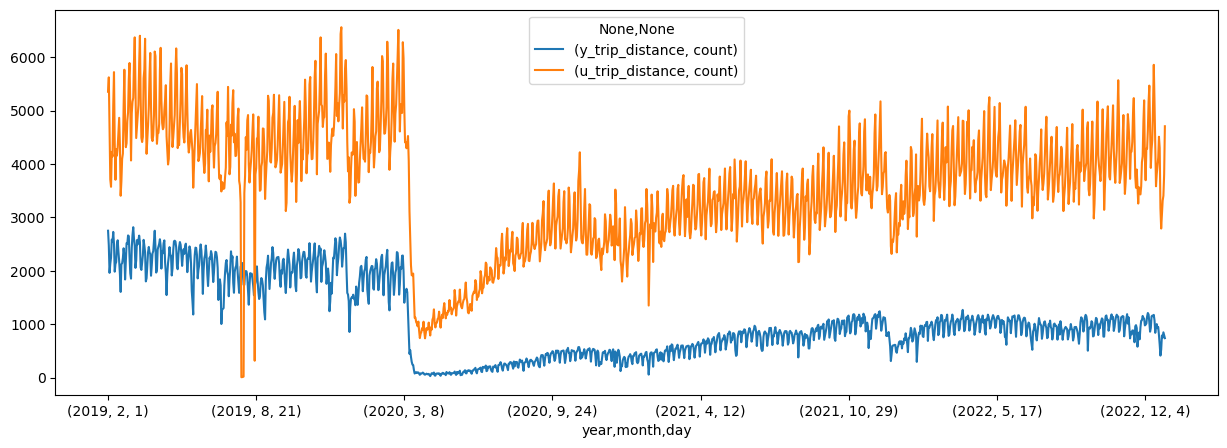

In [56]:
yu_daily.plot(y=[('y_trip_distance','count'),('u_trip_distance','count')],figsize=(15,5))

In [108]:
yu_by_year = yu_daily.groupby(level='year').agg({('y_trip_distance','count'):'sum',
                                               ('u_trip_distance','count'):'sum',
                                                 ('y_trip_distance','mean'):'mean',
                                                 ('u_trip_distance','mean'):'mean',
                                               ('y_trip_time','mean'):'mean',
                                               ('u_trip_time','mean'):'mean',
                                               ('y_tip_rate','mean'):'mean',
                                                ('u_tip_rate','mean'):'mean'})

Text(0, 0.5, 'The number of trips')

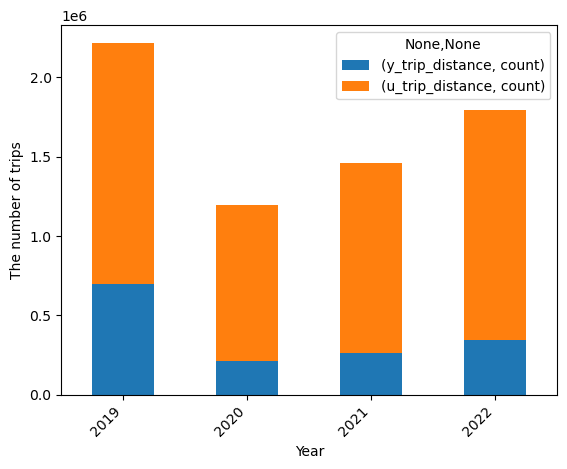

In [109]:
yu_by_year.plot(y=[('y_trip_distance','count','sum'),('u_trip_distance','count','sum')],kind='bar',stacked=True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('The number of trips') 

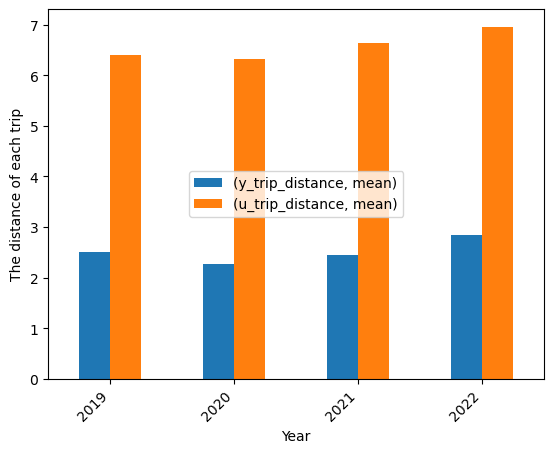

In [111]:
yu_by_year.plot(y=[('y_trip_distance','mean','mean'),('u_trip_distance','mean','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('The distance of each trip') 
plt.legend(loc='center')

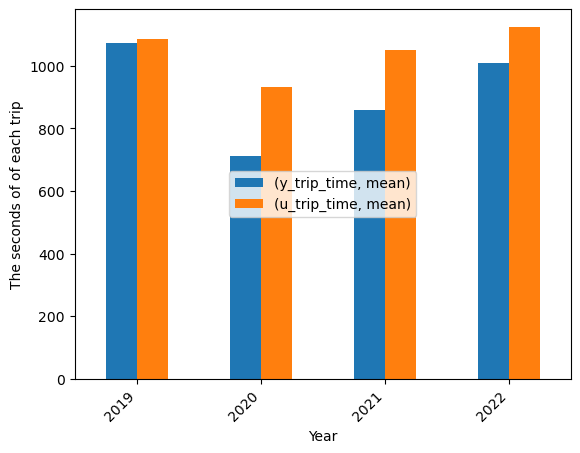

In [112]:
yu_by_year.plot(y=[('y_trip_time','mean','mean'),('u_trip_time','mean','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('The seconds of of each trip')
plt.legend(loc='center')

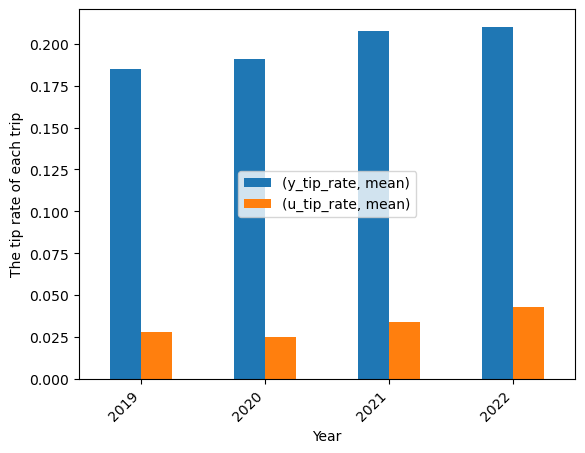

In [113]:
yu_by_year.plot(y=[('y_tip_rate','mean','mean'),('u_tip_rate','mean','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('The tip rate of each trip')
plt.legend(loc='center')

In [114]:
yu_by_month = yu_daily.groupby(level='month').agg({('y_trip_distance','count'):['sum','mean'],
                                                   ('u_trip_distance','count'):['sum','mean'],
                                                   ('y_trip_distance','mean'):'mean',
                                                 ('u_trip_distance','mean'):'mean',
                                                   ('y_trip_time','mean'):'mean',
                                                   ('u_trip_time','mean'):'mean',
                                                   ('y_tip_rate','mean'):'mean',
                                                    ('u_tip_rate','mean'):'mean'})

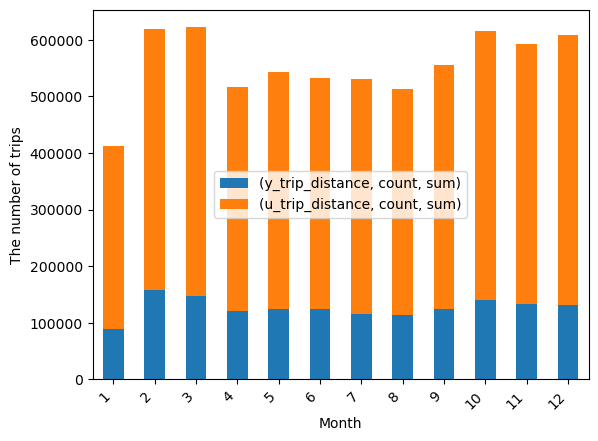

In [87]:
yu_by_month.plot(y=[('y_trip_distance','count','sum'),('u_trip_distance','count','sum')],kind='bar',stacked=True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('The number of trips')
plt.legend(loc=10)

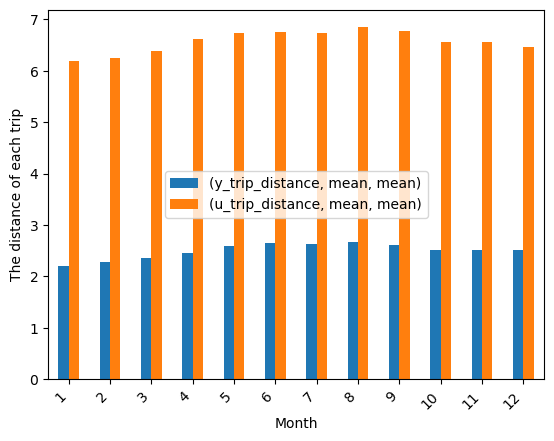

In [115]:
yu_by_month.plot(y=[('y_trip_distance','mean','mean'),('u_trip_distance','mean','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('The distance of each trip') 
plt.legend(loc='center')

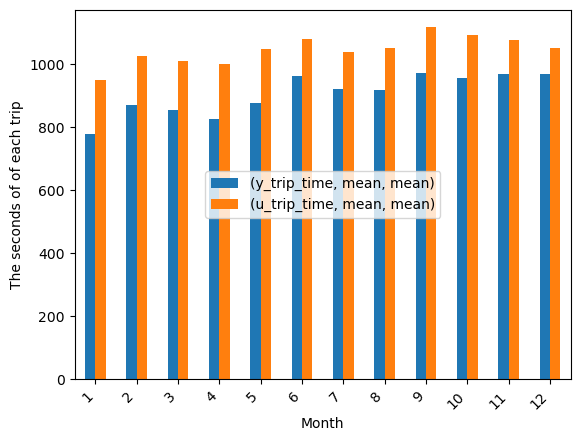

In [89]:
yu_by_month.plot(y=[('y_trip_time','mean','mean'),('u_trip_time','mean','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('The seconds of of each trip')
plt.legend(loc=10)

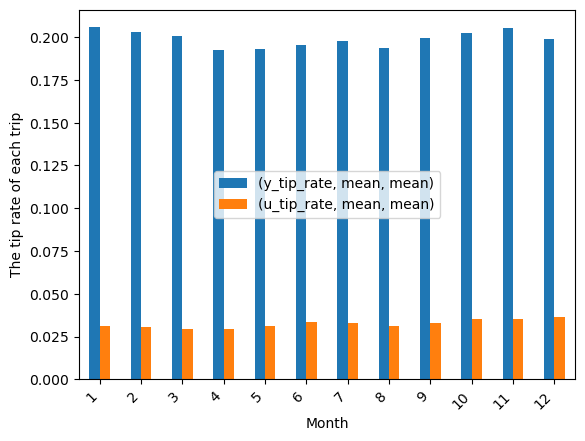

In [91]:
yu_by_month.plot(y=[('y_tip_rate','mean','mean'),('u_tip_rate','mean','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('The tip rate of each trip')
plt.legend(loc=10)

In [97]:
def get_weekday(year, month, day):
    try:
        # 입력된 연도, 월, 일로부터 datetime 객체 생성
        date_object = dt(year, month, day)
        
        # datetime 객체에서 요일을 반환 (0: 월요일, 1: 화요일, ..., 6: 일요일)
        weekday_index = date_object.weekday()
        
        # 인덱스를 이용하여 실제 요일 문자열 반환
        weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        weekday_str = weekdays[weekday_index]
        
        return weekday_str

    except ValueError as e:
        return f"Error: {e}"

In [98]:
weekday_list=[]
for i,j,k in tqdm(yu_daily.index):
    weekday_list.append(get_weekday(i,j,k))

100%|█████████████████████████████████████████████████████████████████████████| 1428/1428 [00:00<00:00, 1432201.37it/s]


In [100]:
yu_daily['weekday'] = weekday_list

In [116]:
yu_by_weekday = yu_daily.groupby('weekday').agg({('y_trip_distance','count'):['sum','mean'],
                                                   ('u_trip_distance','count'):['sum','mean'],
                                                  ('y_trip_distance','mean'):'mean',
                                                 ('u_trip_distance','mean'):'mean',
                                                   ('y_trip_time','mean'):'mean',
                                                   ('u_trip_time','mean'):'mean',
                                                   ('y_tip_rate','mean'):'mean',
                                                    ('u_tip_rate','mean'):'mean'})
yu_by_weekday

y_trip_distance              u_trip_distance               \
                    count                        count                
                      sum         mean             sum         mean   
weekday                                                               
Friday             240058  1171.014634          827403  4036.112195   
Monday             194746   954.637255          632408  3100.039216   
Saturday           218405  1065.390244          861669  4203.263415   
Sunday             173014   856.504950          714650  3537.871287   
Thursday           239716  1175.078431          739878  3626.852941   
Tuesday            222579  1091.073529          666658  3267.931373   
Wednesday          232270  1138.578431          699093  3426.926471   

          y_trip_distance u_trip_distance y_trip_time  u_trip_time y_tip_rate  \
                     mean            mean        mean         mean       mean   
                     mean            mean        mean         mean       mean   
weekday                                                                         
Friday           2.580367        6.651487  948.717944  1098.772884   0.198019   
Monday           2.501581        6.590428  861.190616  1023.583771   0.200621   
Saturday         2.438936        6.499784  882.546352  1006.291450   0.193768   
Sunday           2.565814        6.637062  856.989263   957.877894   0.194257   
Thursday         2.549424        6.657290  952.839906  1105.694424   0.204210   
Tuesday          2.446469        6.474123  920.176437  1054.598356   0.200260   
Wednesday        2.479023        6.545238  936.629898  1079.042664   0.201175   

          u_tip_rate  
                mean  
                mean  
weekday               
Friday      0.032100  
Monday      0.033022  
Saturday    0.031788  
Sunday      0.030454  
Thursday    0.032862  
Tuesday     0.033430  
Wednesday   0.033706

In [117]:
yu_by_weekday = yu_by_weekday.reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

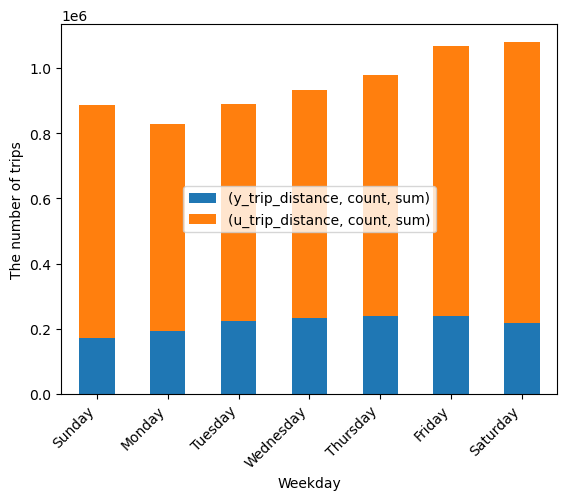

In [105]:
yu_by_weekday.plot(y=[('y_trip_distance','count','sum'),('u_trip_distance','count','sum')],kind='bar',stacked=True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Weekday')
plt.ylabel('The number of trips')
plt.legend(loc=10)

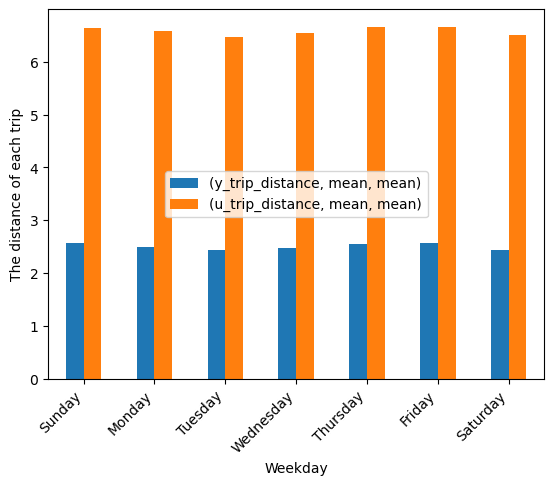

In [118]:
yu_by_weekday.plot(y=[('y_trip_distance','mean','mean'),('u_trip_distance','mean','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Weekday')
plt.ylabel('The distance of each trip') 
plt.legend(loc='center')

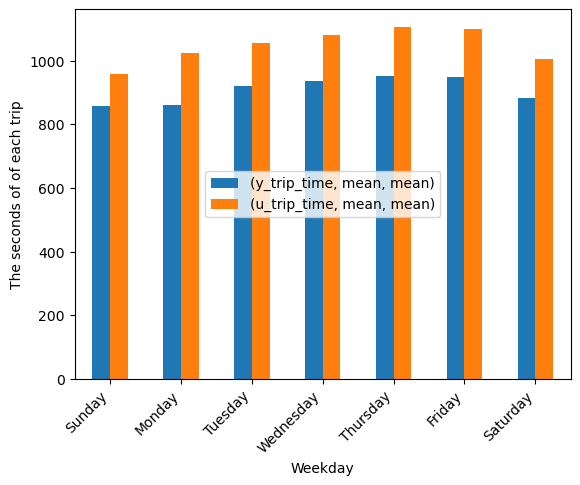

In [106]:
yu_by_weekday.plot(y=[('y_trip_time','mean','mean'),('u_trip_time','mean','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Weekday')
plt.ylabel('The seconds of of each trip')
plt.legend(loc=10)

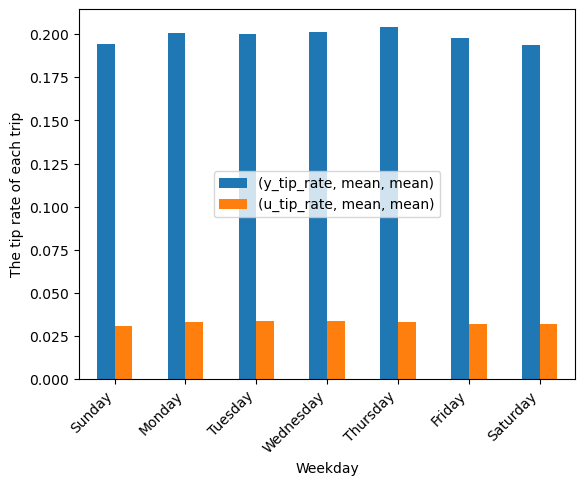

In [107]:
yu_by_weekday.plot(y=[('y_tip_rate','mean','mean'),('u_tip_rate','mean','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Weekday')
plt.ylabel('The tip rate of each trip')
plt.legend(loc=10)

## -2. hourly

In [119]:
yu_hourly

y_trip_distance            y_trip_time y_passenger_count y_fare_amount  \
             count      mean         mean              mean          mean   
0            37912  2.649443   920.489054          1.582691     11.441618   
1            25783  2.622419   976.455300          1.566032     10.991412   
2            17638  2.581578   867.063839          1.577503     10.734753   
3            11631  2.669814   954.355859          1.600034     10.910669   
4             7495  2.820379  1036.867245          1.549433     11.339151   
5             8449  2.442429   850.515801          1.430110     10.210012   
6            24628  2.617806   911.811718          1.412051     10.709780   
7            49721  2.553287   993.637819          1.433479     11.175009   
8            66040  2.409785   980.614173          1.458222     11.496396   
9            70502  2.309996   959.719426          1.462356     11.447798   
10           74351  2.331000   983.289667          1.486651     11.489824   
11           79372  2.326830   980.430215          1.502104     11.631094   
12           85689  2.378776  1013.030739          1.509482     11.818454   
13           88334  2.526815  1032.800405          1.517094     12.165650   
14           94384  2.778855  1104.921449          1.521105     12.987937   
15           96264  2.855928  1147.072467          1.534551     13.278445   
16           92396  2.879049  1167.866596          1.529926     13.415666   
17          101351  2.703967  1096.735178          1.524030     12.744187   
18          107033  2.470831   995.006512          1.528230     11.794675   
19           96233  2.336113   919.008178          1.534713     11.032144   
20           82231  2.387818   891.698119          1.549027     10.943869   
21           78564  2.462414   913.633674          1.569319     11.059115   
22           71288  2.573194   901.314415          1.571863     11.364199   
23           55057  2.663927   956.323483          1.575549     11.512863   

   y_tip_amount y_tip_rate y_airport_fee           y_average_speed  \
           mean       mean           sum      mean            mean   
0      2.078529   0.200978        252.50  0.006660       12.993302   
1      2.022215   0.202339         93.75  0.003636       13.447648   
2      1.988070   0.211660         25.00  0.001417       13.855324   
3      1.872258   0.191151         21.25  0.001827       14.274888   
4      1.688586   0.167577         10.00  0.001334       14.946898   
5      1.536040   0.168332         80.00  0.009469       14.927821   
6      1.770651   0.182322        633.75  0.025733       13.822416   
7      1.997000   0.195259        967.50  0.019459       11.787503   
8      2.123183   0.200143       1106.25  0.016751       10.144741   
9      2.073308   0.194721       1166.25  0.016542        9.873165   
10     2.017753   0.188865       1375.00  0.018493        9.839981   
11     2.034384   0.187346       1387.50  0.017481        9.540881   
12     2.050858   0.187472       1667.50  0.019460        9.479284   
13     2.099284   0.184686       1952.50  0.022104        9.621354   
14     2.194952   0.183599       2667.50  0.028262        9.565812   
15     2.263177   0.184225       2785.00  0.028931        9.503651   
16     2.387777   0.196319       2867.50  0.031035        9.645848   
17     2.338853   0.203291       2676.25  0.026406        9.662191   
18     2.246706   0.208951       1950.00  0.018219        9.925784   
19     2.142513   0.210963       1310.00  0.013613       10.482956   
20     2.120513   0.209045        922.50  0.011218       11.135929   
21     2.165302   0.209916        706.25  0.008989       11.595869   
22     2.197735   0.206626        667.50  0.009363       11.927210   
23     2.179569   0.207581        545.00  0.009899       12.429899   

   u_trip_distance            u_trip_time u_base_passenger_fare u_tip_amount  \
             count      mean         mean                  mean         mean   
0           181911 

Text(0, 0.5, 'The number of trips')

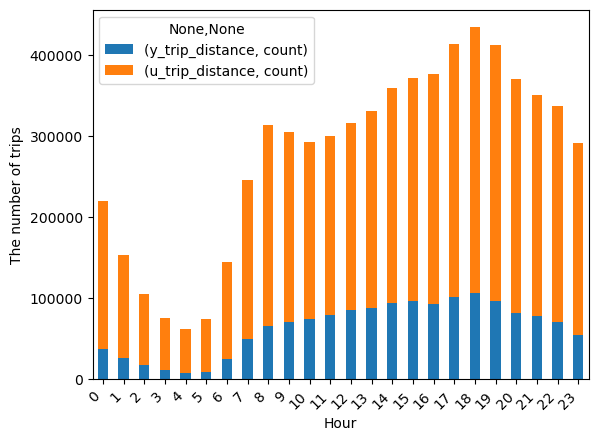

In [129]:
yu_hourly.plot(y=[('y_trip_distance','count'),('u_trip_distance','count')],kind='bar',stacked=True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hour')
plt.ylabel('The number of trips')

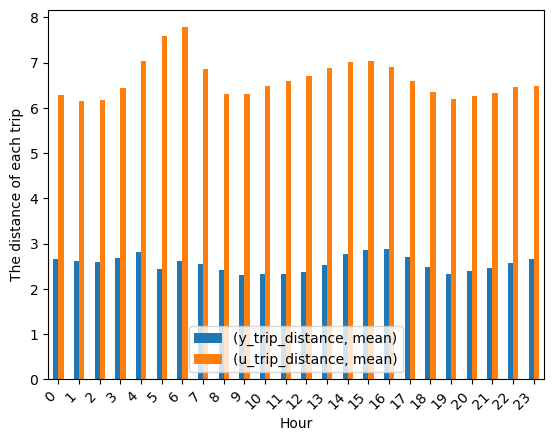

In [132]:
yu_hourly.plot(y=[('y_trip_distance','mean'),('u_trip_distance','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hour')
plt.ylabel('The distance of each trip')
plt.legend(loc='lower center')

Text(0, 0.5, 'The seconds of of each trip')

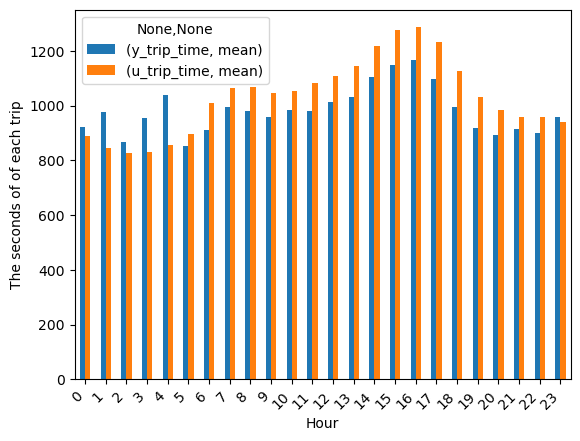

In [133]:
yu_hourly.plot(y=[('y_trip_time','mean'),('u_trip_time','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hour')
plt.ylabel('The seconds of of each trip')

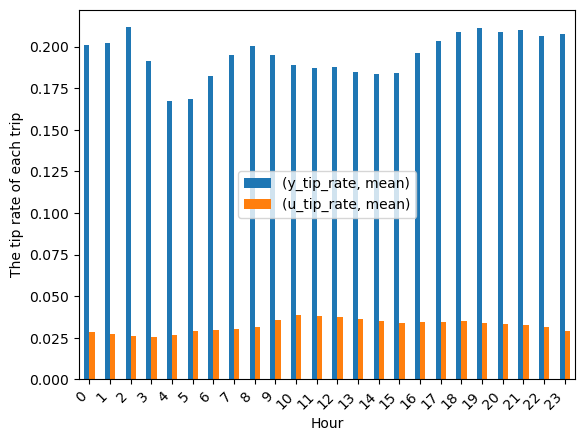

In [135]:
yu_hourly.plot(y=[('y_tip_rate','mean'),('u_tip_rate','mean')],kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hour')
plt.ylabel('The tip rate of each trip')
plt.legend(loc=10)